<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Losso%2BAssociation_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/LassoRegression_Feature.csv', index_col=0)
df.head()

,InPatient,Sex,Age,BMI,Systolic-BP,L2-BUN,L8-Uric,L9-Calcium,L10-Phosphorus,L11-Albumin,...,G1M4-Non-dihydropyridine-CCB,G4M3-Uricosuric-agent,D2-Diabetes-mellitus,D5-Systemic-sclerosis,D9-HCV-infection,D11-Heart-failure,D13-Kidney-stone,D14-Valvular-heart-disease,eGFR_t1,L1-eGFR
0,0,1,73,20.80,127.0,18.500,4.481,9.643,3.244,4.652,...,0,0,2,0,0,0,0,0,63.60,71.70
1,0,1,74,20.27,105.0,13.000,3.800,9.629,3.787,4.729,...,0,0,2,0,0,0,0,0,70.20,63.60
2,0,1,75,20.72,138.0,6.500,4.322,8.864,3.486,3.798,...,0,0,1,0,0,0,0,0,64.02,70.20
3,0,1,76,20.27,134.0,13.873,4.528,9.248,3.615,4.390,...,0,0,1,0,0,0,0,0,48.54,64.02
4,0,1,78,19.05,103.0,14.500,5.298,9.149,3.816,4.194,...,0,0,1,0,0,0,0,0,80.47,48.54


In [3]:
df.columns

Index(['InPatient', 'Sex', 'Age', 'BMI', 'Systolic-BP', 'L2-BUN', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L15-Platelet',
       'L20-HbA1c', 'L22-Triglyceride', 'L23-LDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G5M1-Ketoanalog-amino-acid',
       'D1-Hypertension', 'D4-SLE', 'D6-Rheumatoid-arthritis',
       'D12-Thalassemia', 'D15-Solid-malignancy', 'Slopes', 'OutPatient',
       'BSA', 'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L19-Blood-sugar', 'L24-HDL-Cholesterol',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M3-Dihydropyridine-CCB',
       'G1M1-ACEI', 'G2M3-DPP4-inhibitor', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G4M2-Febuxostat',
       'G1M4-Non-dihydropyridine-CCB', 'G4M3-Uricosuric-agent',
       'D2-Diabetes-mellitus', 'D5-Systemic-sclerosis', 'D9-HCV-infection',
       'D11-H

In [4]:
selected_columns = ['InPatient', 'OutPatient',
      'Sex', 'Age', 'BMI', 'BSA', 'Systolic-BP','Slopes',
    'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
    'L1-eGFR', 'L2-BUN',
       'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df_selected = df[selected_columns]

In [5]:
df_selected.shape

(52620, 55)

In [6]:
df_selected.describe()

,InPatient,OutPatient,Sex,Age,BMI,BSA,Systolic-BP,Slopes,G1M2-ARB,G3M1-Statin,...,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.088027,0.868890,0.479932,66.812828,24.657083,1.656821,136.058107,-2.169255,8.887628,30.067104,...,12.435796,38.087801,7.279853,246.952447,120.499811,6.519305,139.219384,111.819297,52.145962,88.277345
std,0.283337,0.337524,0.499602,11.646585,3.652668,0.164151,17.253685,9.785498,27.112374,43.033413,...,1.671501,5.020433,2.276061,74.997597,49.196827,1.399190,72.447643,34.752885,12.711384,58.046303
min,0.000000,0.000000,0.000000,18.000000,11.120000,1.000000,60.000000,-79.002653,0.000000,0.000000,...,4.200000,0.000000,1.250000,31.000000,40.000000,4.000000,20.000000,10.000000,20.000000,0.000000
25%,0.000000,1.000000,0.000000,60.000000,22.370000,1.540000,126.000000,-6.381052,0.000000,0.000000,...,11.482000,35.300000,5.890000,202.000000,93.000000,5.600000,94.457500,89.000000,44.000000,39.822000
50%,0.000000,1.000000,0.000000,67.000000,24.467650,1.650000,136.000000,-1.706494,0.000000,0.000000,...,12.502000,38.458000,6.971500,241.000000,104.000000,6.045000,117.000000,110.000000,50.000000,76.425000
75%,0.000000,1.000000,1.000000,75.000000,26.560000,1.770000,146.000000,2.488436,0.000000,70.000000,...,13.600000,41.562000,8.200000,285.000000,131.402500,7.000000,166.490000,128.000000,59.780000,125.958250
max,1.000000,1.000000,1.000000,102.000000,49.430000,3.000000,200.000000,106.892857,365.000000,400.000000,...,19.400000,67.000000,29.900000,998.000000,989.000000,15.000000,856.000000,300.000000,196.000000,499.000000


In [7]:
df_selected.head()

,InPatient,OutPatient,Sex,Age,BMI,BSA,Systolic-BP,Slopes,G1M2-ARB,G3M1-Statin,...,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,0,1,1,73,20.80,1.39,127.0,-7.158596,90,0,...,12.830,39.367,4.9248,194.24,91.0,5.284,81.0,123.0,99.0,21.019
1,0,1,1,74,20.27,1.38,105.0,5.550691,90,90,...,13.498,41.270,5.1634,251.46,86.0,5.755,64.0,146.0,73.0,15.198
2,0,1,1,75,20.72,1.38,138.0,-6.063710,100,100,...,10.100,32.400,9.4100,313.00,100.0,5.300,62.0,129.0,65.0,30.879
3,0,1,1,76,20.27,1.36,134.0,-12.812245,35,0,...,12.653,39.053,4.3718,204.65,89.0,5.562,69.0,139.0,76.0,36.916
4,0,1,1,78,19.05,1.33,103.0,28.287500,100,0,...,10.700,34.600,5.4200,434.00,88.0,5.500,74.0,129.0,60.0,28.684


##แบ่งข้อมูล

### Age

In [8]:
df_selected['Age'].min()

18

In [9]:
df_selected['Age'].max()

102

In [10]:
#from pandas import cut

# Create bins and labels
#bins = [i for i in range(18, 108, 5)]  # Extend bins to include up to 102
#labels = [f"[{i},{i + 4})" for i in range(18, 103, 5)]  # Adjusted labels to match bins

# Apply the binning to the 'Age' column
#df_selected["age"] = df_selected.Age.apply(lambda x: -1 if x < 18 or x > 102 else x)
#df_selected["age"] = cut(df_selected["Age"], bins, right=False, labels=labels).astype(str)

In [11]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 65]
labels = ['Adult', 'Older']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['Age_range'] = binning(df_selected['Age'], cut_points, labels)

https://service-manual.nhs.uk/content/inclusive-content/age

###Slope

In [12]:
def categorize_slope(slope):
    if slope < 0.75:
        return 'Stable and better'  # Slope ลดลงน้อยกว่า 0.75 ml/min/year
    elif slope > 5:
        return 'Worse'  # Slope ลดลงมากกว่า 5 ml/min/year
    elif 0.75 <= slope <= 5:
        return 'Between'  # Slope อยู่ระหว่าง 0.75 และ 5 ml/min/year #Intermediate
    else:
        return 'Out of range'  # กรณีที่ไม่อยู่ในช่วงที่กำหนด

# Assuming df_selected is your DataFrame and 'Slopes' is a column in it
# Replace df_selected['Slopes'] with your actual column name if different
df_selected['Slopes_Category'] = df_selected['Slopes'].apply(categorize_slope)

###eGFR_t1 & L1-eGFR

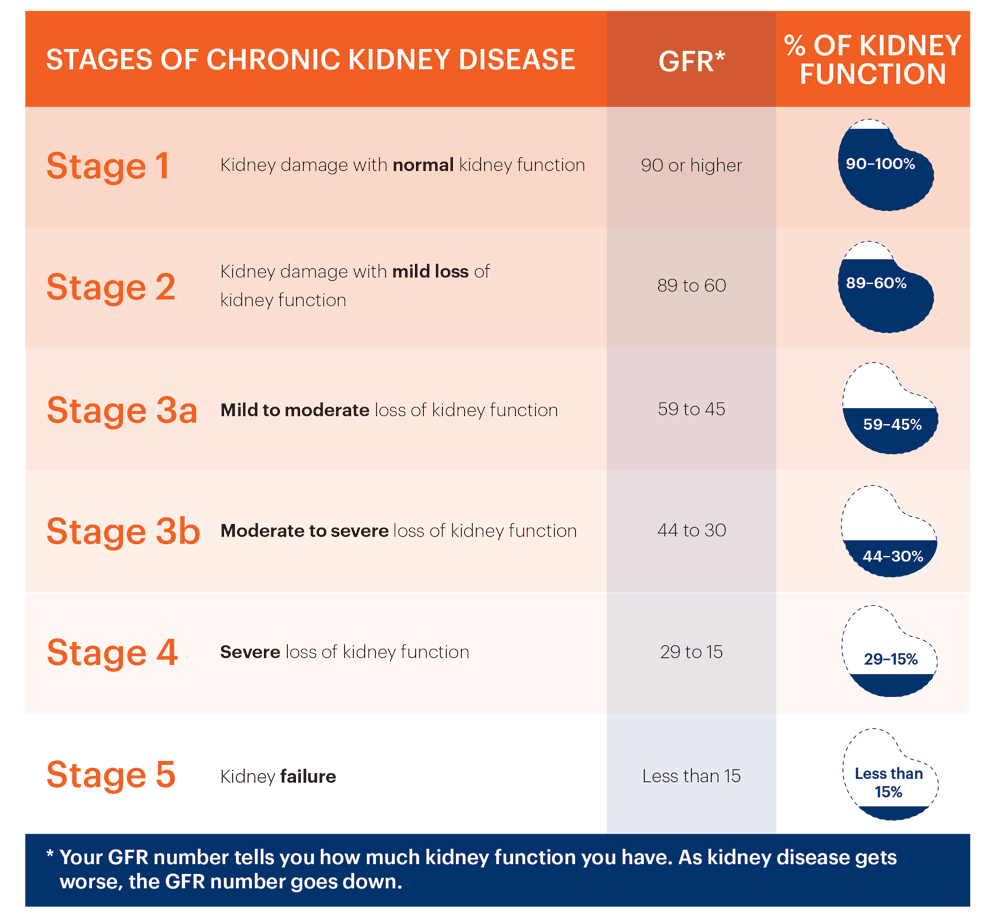

In [13]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
#df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-estimated-glomerular-filtration-rate-egfr

###Systolic BP

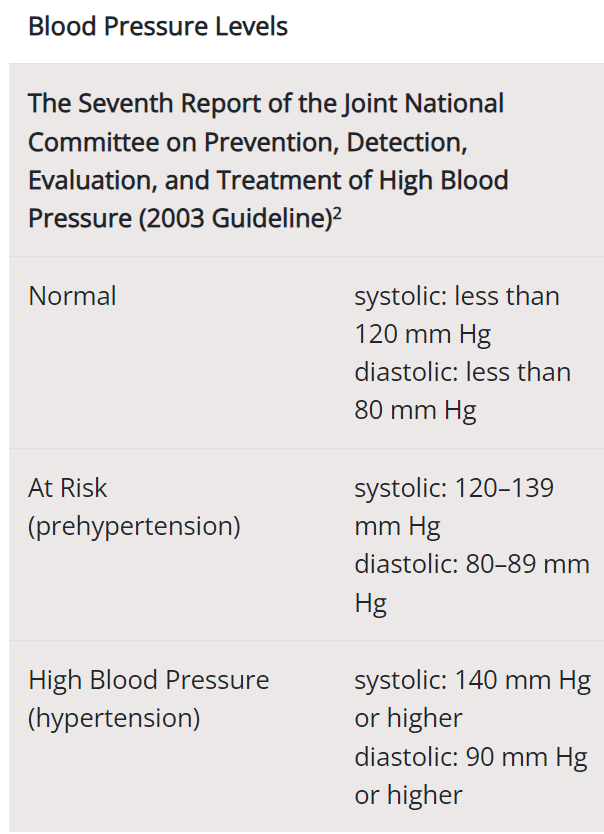

In [14]:
import pandas as pd

def binning(col, cut_points, labels):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))  # Sort the cut_points in ascending order
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

# กำหนดค่าที่ต้องการแบ่งช่วง
cut_points = [119, 139]
labels = ['Normal', 'Risk', 'Hypertension']

# สมมติว่า df_selected เป็น DataFrame ของคุณและ 'Systolic-BP' เป็นชื่อคอลัมน์ที่ต้องการใช้
# แทน df_selected['Systolic-BP'] ด้วยชื่อคอลัมน์ของคุณ
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

In [15]:
df_selected[df_selected['Systolic-BP'] <= 120][['SBP', 'Systolic-BP']].head()

,SBP,Systolic-BP
1,Normal,105.0
4,Normal,103.0
9,Normal,116.0
14,Risk,120.0
64,Normal,116.0


แหล่งที่มา : https://www.cdc.gov/bloodpressure/about.htm

###BSA

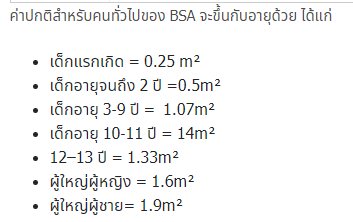

In [16]:
def interpret_BSA_by_sex(BSA_value, sex):
    if sex == 0:  # Male
        if BSA_value == 1.9:
            return "Normal"
        else:
            return "Abnormal"
    elif sex == 1:  # Female
        if BSA_value == 1.6:
            return "Normal"
        else:
            return "Abnormal"
# Add a new column 'BSA_Interpretation' based on 'BSA' values and 'Sex'
df_selected['BSA_range'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)

แหล่งที่มา : https://www.rxlist.com/body_surface_area/definition.htm

###BMI

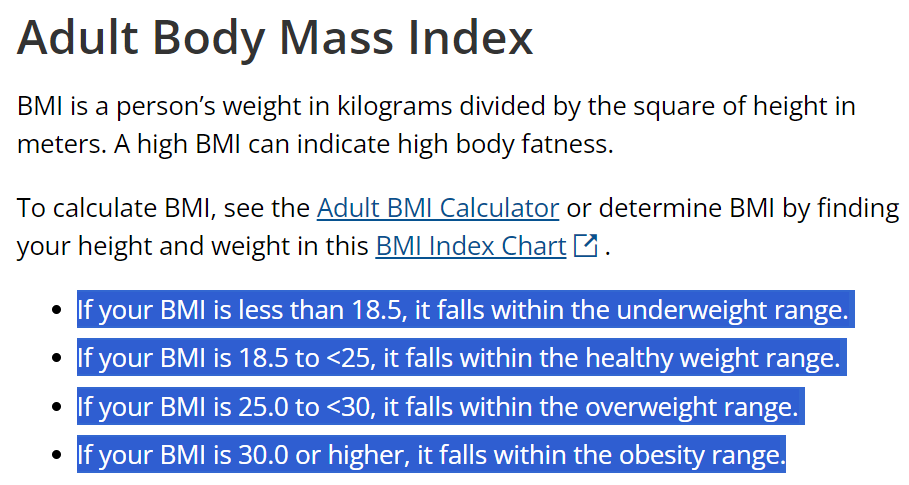

In [17]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI_value < 25:
        return 'Healthy weight'
    elif 25 <= BMI_value < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['BMI_range'] = df_selected['BMI'].apply(interpret_BMI)

แหล่งที่มา : https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

###BUN

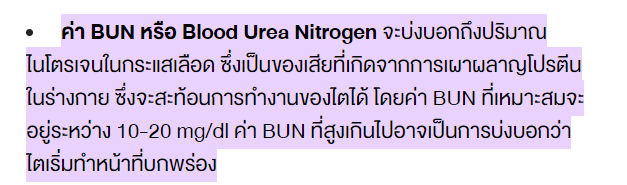

In [18]:
def interpret_BUN(BUN_value):
    if BUN_value < 10:
        return 'Low'
    elif 10 <= BUN_value <= 20:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'BUN_level' based on 'BUN' values
df_selected['BUN'] = df_selected['L2-BUN'].apply(interpret_BUN)

แหล่งที่มา : https://hdmall.co.th/c/kidney-screening

###Creatinine

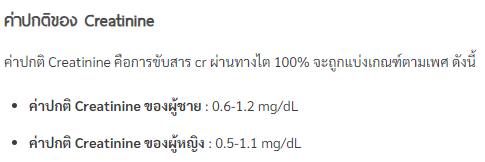

In [19]:
#def interpret_creatinine_by_sex(creatinine_value, sex):
#   if sex == 0:  # Male
 #       if 0.6 <= creatinine_value <= 1.2:
 #           return 'Normal'
  #      elif creatinine_value < 0.6:
  #          return 'Low'
  #      else:
  #          return 'High'
  #  elif sex == 1:  # Female
  #      if 0.5 <= creatinine_value <= 1.1:
  #          return 'Normal'
 #       elif creatinine_value < 0.5:
  #          return 'Low'
 #       else:
  #          return 'High'

# Add a new column 'Creatinine_Interpretation' based on 'Creatinine' values and 'Sex'
#df_selected['Creatinine'] = df_selected.apply(lambda row: interpret_creatinine_by_sex(row['L3-Creatinine'], row['Sex']), axis=1)

แหล่งที่มา : https://www.samitivejchinatown.com/th/health-article/renal-function-test

###Sodium

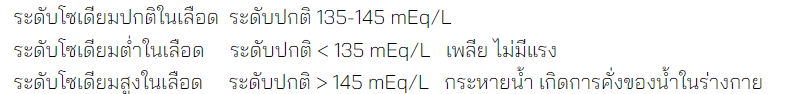

In [20]:
def interpret_sodium(sodium_value):
    if sodium_value < 135:
        return 'Low'
    elif 135 <= sodium_value <= 145:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'sodium_level' based on 'L4-Sodium' values
df_selected['Sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)

แหล่งที่มา : https://sriphat.med.cmu.ac.th/th/knowledge-61#:~:text=%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3&text=%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4%E0%B9%83%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%94,%E0%B8%84%E0%B8%B1%E0%B9%88%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B9%83%E0%B8%99%E0%B8%A3%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A2

###Chloride

In [21]:
def interpret_chloride(chloride_value):
    if chloride_value < 96:
        return 'Low'
    elif 96 <= chloride_value <= 106:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'chloride_level' based on 'L6-Chloride' values
df_selected['Chloride'] = df_selected['L6-Chloride'].apply(interpret_chloride)


แหล่งที่มา : https://www.mountsinai.org/health-library/tests/chloride-test-blood#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.

###Bicarbonate

In [22]:
def interpret_bicarbonate(bicarbonate_value):
    if bicarbonate_value < 22:
        return 'Low'
    elif 22 <= bicarbonate_value <= 29:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'bicarbonate_level' based on 'L7-Bicarbonate' values
df_selected['Bicarbonate'] = df_selected['L7-Bicarbonate'].apply(interpret_bicarbonate)


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-serum-bicarbonate

###Uric

https://www.ucsfhealth.org/medical-tests/uric-acid----blood-

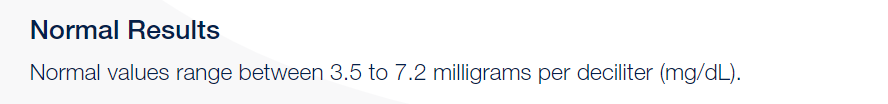

In [23]:
def interpret_uric(uric_value):
     if uric_value < 3.5:
        return 'Low'
     elif 3.5 <= uric_value <= 7.2:
        return 'Normal'
     else:
        return 'High'

# Add a new column 'uric' based on 'L8-Uric' values
df_selected['Uric'] = df_selected['L8-Uric'].apply(interpret_uric)


###Calcium

https://www.ucsfhealth.org/medical-tests/calcium-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

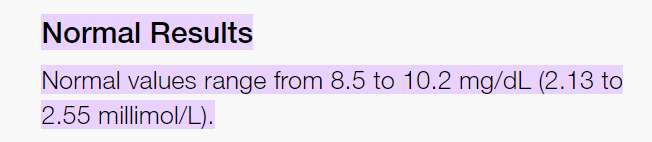

In [24]:
def interpret_calcium(calcium_value):
    if calcium_value < 8.5:
        return 'Low'
    elif 8.5 <= calcium_value <= 10.2:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'calcium_level' based on 'L9-Calcium' values
df_selected['Calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)


###Phosphorus

https://www.ucsfhealth.org/medical-tests/phosphorus-blood-test

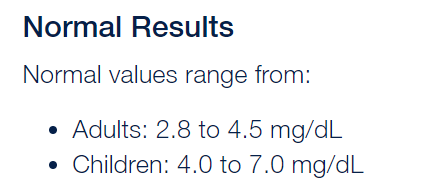

In [25]:
def interpret_phosphorus(phosphorus_value):
    if phosphorus_value < 2.8:
        return 'Low'
    elif 2.8 <= phosphorus_value <= 4.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'phosphorus_level' based on 'L10-Phosphorus' values
df_selected['Phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)


###Albumin

https://www.ucsfhealth.org/medical-tests/albumin-blood-(serum)-test#:~:text=The%20normal%20range%20is%203.4,vary%20slightly%20among%20different%20laboratories.

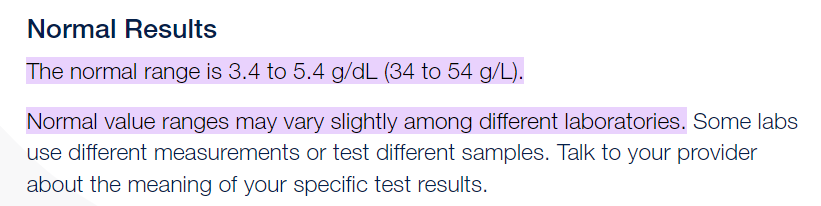

In [26]:
def interpret_albumin(albumin_value):
    if albumin_value < 3.4:
        return 'Low'
    elif 3.4 <= albumin_value <= 5.4:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['Albumin'] = df_selected['L11-Albumin'].apply(interpret_albumin)


###Hemoglobin

https://www.ucsfhealth.org/medical-tests/hemoglobin

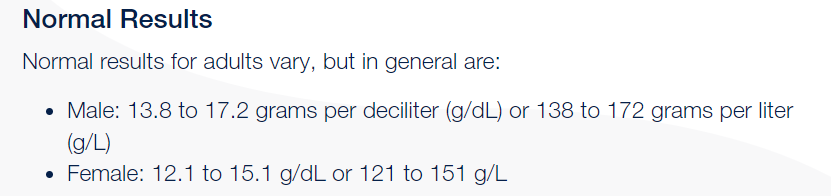

In [27]:
def interpret_Hemoglobin_by_sex(Hemoglobin_value, sex):
    if sex == 0:  # Male
        if 13.8 <= Hemoglobin_value <= 17.2:
            return 'Normal'
        elif Hemoglobin_value < 13.8:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 12.1 <= Hemoglobin_value <= 15.1:
            return 'Normal'
        elif Hemoglobin_value < 12.1:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hemoglobinl' based on 'L12-Hemoglobin' values and 'Sex'
df_selected['Hemoglobin'] = df_selected.apply(lambda row: interpret_Hemoglobin_by_sex(row['L12-Hemoglobin'], row['Sex']), axis=1)


###Hematocrit

https://www.redcrossblood.org/donate-blood/dlp/hematocrit.html#:~:text=A%20hematocrit%20level%20below%20the,may%20indicate%20polycythemia%20or%20erythrocytosis.

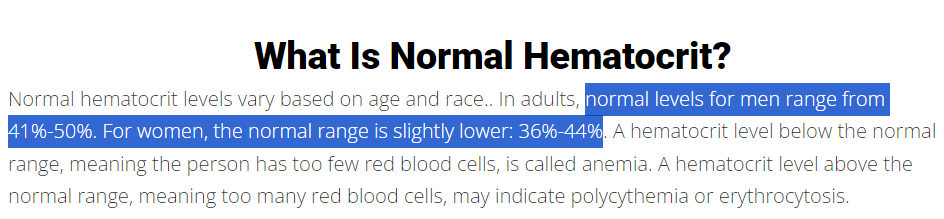

In [28]:
def interpret_Hematocrit_by_sex(Hematocrit_value, sex):
    if sex == 0:  # Male
        if 41 <= Hematocrit_value <= 50:
            return 'Normal'
        elif Hematocrit_value < 41:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 36 <= Hematocrit_value <= 44:
            return 'Normal'
        elif Hematocrit_value < 36:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hematocrit' based on 'L13-Hematocrit' values and 'Sex'
df_selected['Hematocrit'] = df_selected.apply(lambda row: interpret_Hematocrit_by_sex(row['L13-Hematocrit'], row['Sex']), axis=1)


###WBC

https://www.mountsinai.org/health-library/tests/wbc-count#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

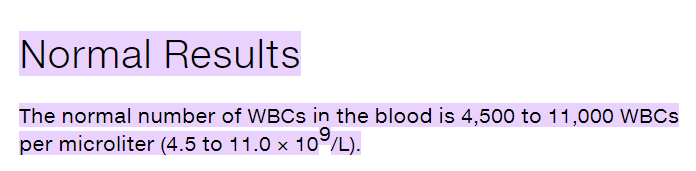

In [29]:
def interpret_WBC(WBC_value):
    if WBC_value < 4.5:
        return 'Low'
    elif 4.5 <= WBC_value <= 11:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['WBC'] = df_selected['L14-WBC'].apply(interpret_WBC)


###Platelet

https://www.ucsfhealth.org/medical-tests/platelet-count

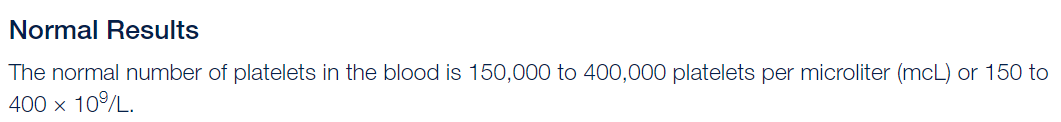

In [30]:
def interpret_Platelet(Platelet_value):
    if Platelet_value < 150:
        return 'Low'
    elif 150 <= Platelet_value <= 400:
        return 'Normal'
    else:
        return 'High'

df_selected['Platelet'] = df_selected['L15-Platelet'].apply(interpret_Platelet)

###Blood-sugar

https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood

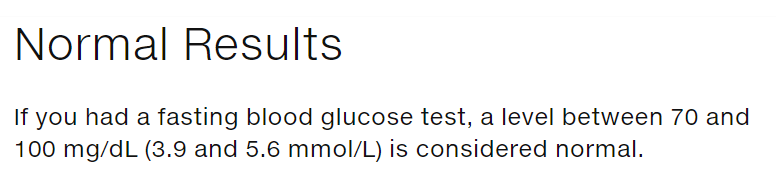

In [31]:
def interpret_BloodSugar(BloodSugar_value):
    if BloodSugar_value < 70:
        return 'Low'
    elif 70 <= BloodSugar_value <= 100:
        return 'Normal'
    else:
        return 'High'

df_selected['Blood-sugar'] = df_selected['L19-Blood-sugar'].apply(interpret_BloodSugar)

###HbA1c

https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/#:~:text=To%20diagnose%20diabetes%20or%20prediabetes,A1C%20of%206.5%25%20or%20higher

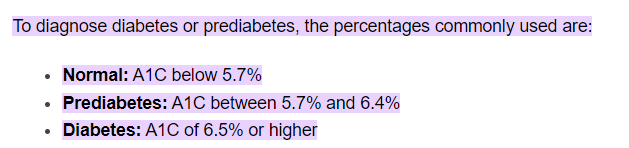

In [32]:
def interpret_HbA1c(HbA1c_value):
    if HbA1c_value < 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c_value <= 6.4:
        return 'Prediabetesl'
    else:
        return 'Diabetes'

df_selected['HbA1c'] = df_selected['L20-HbA1c'].apply(interpret_HbA1c)

###Triglyceride

https://medlineplus.gov/lab-tests/triglycerides-test/

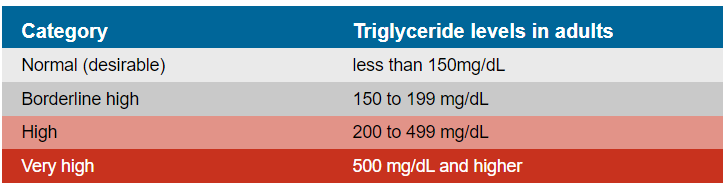

In [33]:
def interpret_Triglyceride(Triglyceride_value):
    if Triglyceride_value < 150:
        return 'Normal'
    elif 150 <= Triglyceride_value <= 199:
        return 'Borderline high'
    elif 200 <= Triglyceride_value <= 499:
        return 'High'
    else:
        return 'Very high'

df_selected['Triglyceride'] = df_selected['L22-Triglyceride'].apply(interpret_Triglyceride)

###LDL-Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

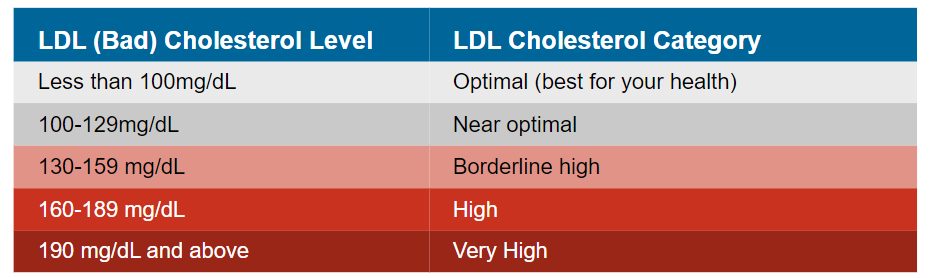

In [34]:
def interpret_LDL(LDL_value):
    if LDL_value < 100:
        return 'Optimal'
    elif 100 <= LDL_value <= 129:
        return 'Near Optimal'
    elif 130 <= LDL_value <= 159:
        return 'Borderline High'
    elif 160 <= LDL_value <= 189:
        return 'High'
    else:
        return 'Very High'

df_selected['LDL-Cholesterol'] = df_selected['L23-LDL-Cholesterol'].apply(interpret_LDL)

###HDL-Cholesterol


https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

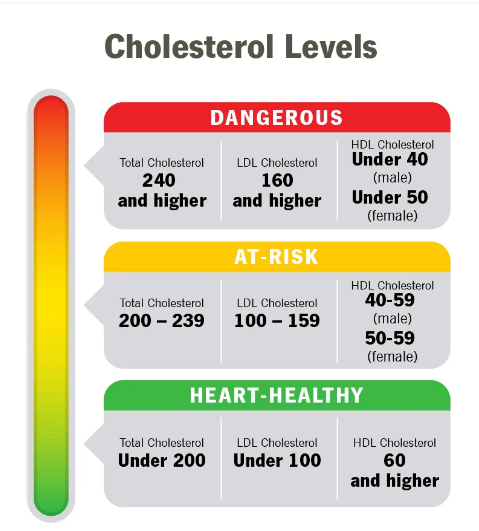

In [35]:
def interpret_HDL_by_sex(HDL_value, sex):
    if sex == 0:  # Male
        if HDL_value < 40:
            return 'Dangerous'
        elif 40 <= HDL_value <= 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'
    elif sex == 1:  # Female
        if HDL_value <50:
            return 'Dangerous'
        elif 50<= HDL_value < 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'

df_selected['HDL-Cholesterol'] = df_selected.apply(lambda row: interpret_HDL_by_sex(row['L24-HDL-Cholesterol'], row['Sex']), axis=1)


###UrineProtein-Cr-ratio

https://www.healthline.com/health/kidney-disease/urine-protein-creatinine-ratio#levels

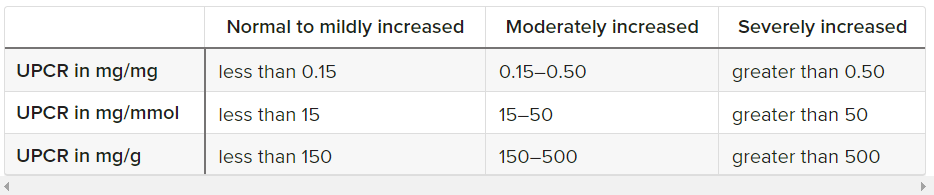

In [36]:
def interpret_UPCR(UPCR_value):
    if UPCR_value < 0.15:
        return 'Normal'
    elif 0.15 <= UPCR_value <= 0.5:
        return 'Moderately'
    else:
        return 'Severely'

df_selected['UPCR'] = df_selected['L28-UrineProtein-Cr-ratio'].apply(interpret_UPCR)

### drug groups

In [37]:
drug = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent']
drug = df[drug]

In [38]:
drug.head()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,G3M3-Fibrate,G4M1-Allopurinol,G1M9-Vasodilator,G1M8-Alpha-blocker,G4M2-Febuxostat,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G4M3-Uricosuric-agent
0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100,100,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,0,1,35,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
drug.shape

(52620, 17)

In [40]:
drug.describe()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,G3M3-Fibrate,G4M1-Allopurinol,G1M9-Vasodilator,G1M8-Alpha-blocker,G4M2-Febuxostat,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G4M3-Uricosuric-agent
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,8.887628,30.067104,1.047681,2.593330,9.167389,0.683390,6.630274,13.154257,4.558723,0.957944,4.957317,3.167256,4.171532,0.258989,1.772995,0.333694,0.109787
std,27.112374,43.033413,8.089661,14.695136,27.310031,7.339541,23.274212,32.222202,20.356311,9.380485,20.927421,16.323534,18.723921,4.904211,12.106452,5.319310,3.215718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,365.000000,400.000000,200.000000,252.000000,210.000000,195.000000,240.000000,315.000000,271.000000,240.000000,252.000000,210.000000,210.000000,119.000000,210.000000,105.000000,180.000000


In [41]:
#import pandas as pd

# คอลัมน์ของยาทั้งหมด
#drug_columns = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
#       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
 #       'G2M3-DPP4-inhibitor', 'G3M3-Fibrate', 'G2M5-SGLT2i',
  #      'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
 #       'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
  #      'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
 #       'G4M3-Uricosuric-agent']

# สร้างฟังก์ชันเพื่อตรวจสอบการรับประทานยาของแต่ละคอลัมน์
#def check_medication(cell_value):
#    try:
        # แปลงค่าเป็นตัวเลข
#        cell_value = int(cell_value)
 #       return 'Yes' if cell_value > 0 else 'No'
#    except ValueError:
        # กรณีไม่สามารถแปลงได้
#        return 'No'

# สร้างคอลัมน์ใหม่สำหรับการเก็บค่าที่แปลงแล้วของแต่ละยา
#for column in drug_columns:
  #  df_selected[f'{column}_taken'] = df_selected[column].apply(check_medication)


In [42]:
import pandas as pd

# คอลัมน์ของยาทั้งหมด
drug_columns  = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent']

# สร้างคอลัมน์ใหม่สำหรับแต่ละยาที่ระบุว่าคนไข้กินหรือไม่กิน
for col in drug_columns:
    df_selected[col + '_taken'] = (df_selected[col] > 0).astype(int)

In [43]:
df_selected[['G1M2-ARB','G1M2-ARB_taken','G3M1-Statin', 'G3M1-Statin_taken',
       'G5M2-NSAIDs','G5M2-NSAIDs_taken']].head()

,G1M2-ARB,G1M2-ARB_taken,G3M1-Statin,G3M1-Statin_taken,G5M2-NSAIDs,G5M2-NSAIDs_taken
0,90,1,0,0,0,0
1,90,1,90,1,0,0
2,100,1,100,1,34,1
3,35,1,0,0,1,1
4,100,1,0,0,15,1


### diag groups

In [44]:
diag = [ 'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy']
diag = df[diag]

In [45]:
diag.describe()

,D1-Hypertension,D2-Diabetes-mellitus,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D9-HCV-infection,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.273831,0.226606,0.009502,0.004371,0.016838,0.009977,0.005530,0.001558,0.020334,0.008837,0.043843
std,0.528612,0.471462,0.099529,0.066257,0.131874,0.099387,0.075431,0.039445,0.144075,0.094197,0.209699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,6.000000,3.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000


In [46]:
pd.DataFrame({
    'feature': diag.columns.values,
    'n_unique': diag.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [diag[col].unique() for col in diag.columns]}
).round(3).reset_index(drop=True)

,feature,n_unique,sample_unique
0,D1-Hypertension,5,"[0, 1, 2, 3, 4]"
1,D2-Diabetes-mellitus,6,"[2, 1, 0, 3, 4, 6]"
2,D4-SLE,4,"[0, 1, 2, 3]"
3,D5-Systemic-sclerosis,3,"[0, 1, 2]"
4,D6-Rheumatoid-arthritis,5,"[0, 1, 2, 5, 3]"
5,D9-HCV-infection,2,"[0, 1]"
6,D11-Heart-failure,3,"[0, 1, 2]"
7,D12-Thalassemia,2,"[0, 1]"
8,D13-Kidney-stone,4,"[0, 1, 2, 3]"
9,D14-Valvular-heart-disease,3,"[0, 1, 2]"


In [47]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
#diag_columns =  ['D1-Hypertension',
 #      'D2-Diabetes-mellitus', 'D4-SLE',
 #      'D6-Rheumatoid-arthritis',  'D9-HCV-infection',
 #      'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
  #     'D14-Valvular-heart-disease', 'D15-Solid-malignancy']

# สร้างฟังก์ชันเพื่อตรวจสอบการรับประทานยาของแต่ละคอลัมน์
#def check_diagnose(cell_value):
 #   try:
        # แปลงค่าเป็นตัวเลข
   #     cell_value = int(cell_value)
   #     return 'Yes' if cell_value > 0 else 'No'
  #  except ValueError:
        # กรณีไม่สามารถแปลงได้
  #      return 'No'

# สร้างคอลัมน์ใหม่สำหรับการเก็บค่าที่แปลงแล้วของแต่ละยา
#for column in diag_columns:
 #   df_selected[f'{column}_check'] = df_selected[column].apply(check_diagnose)

In [48]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
diag_columns = [ 'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy']

# สร้างคอลัมน์ใหม่สำหรับแต่ละการตรวจที่ระบุว่าผู้ป่วยมีการตรวจหรือไม่มีการตรวจ
for col in diag_columns:
    df_selected[col + '_check'] = (df_selected[col] > 0).astype(int)

In [49]:
df_selected[['D1-Hypertension','D1-Hypertension_check', 'D2-Diabetes-mellitus','D2-Diabetes-mellitus_check']].head()

,D1-Hypertension,D1-Hypertension_check,D2-Diabetes-mellitus,D2-Diabetes-mellitus_check
0,0,0,2,1
1,0,0,2,1
2,0,0,1,1
3,0,0,1,1
4,1,1,1,1


## Association Rule

In [51]:
data =['InPatient', 'OutPatient','Sex', 'Age_range', 'BMI_range', 'BSA_range', 'SBP','Slopes_Category',
    'G1M2-ARB_taken', 'G3M1-Statin_taken', 'G5M2-NSAIDs_taken',
       'G1M5-Diuretic_taken', 'G1M3-Dihydropyridine-CCB_taken',
       'G1M6-MRA_taken', 'G1M1-ACEI_taken', 'G2M2-Metformin_taken', 'G2M3-DPP4-inhibitor_taken',
       'G3M3-Fibrate_taken', 'G4M1-Allopurinol_taken',
       'G1M9-Vasodilator_taken', 'G1M8-Alpha-blocker_taken',
       'G4M2-Febuxostat_taken', 'G1M4-Non-dihydropyridine-CCB_taken',
       'G5M1-Ketoanalog-amino-acid_taken', 'G4M3-Uricosuric-agent_taken',
    'D1-Hypertension_check', 'D2-Diabetes-mellitus_check', 'D4-SLE_check',
       'D5-Systemic-sclerosis_check', 'D6-Rheumatoid-arthritis_check', 'D9-HCV-infection_check',
       'D11-Heart-failure_check', 'D12-Thalassemia_check', 'D13-Kidney-stone_check',
       'D14-Valvular-heart-disease_check', 'D15-Solid-malignancy_check',
    'eGFR_Category', 'BUN',
       'Sodium', 'Chloride', 'Bicarbonate', 'Uric',
       'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin',
       'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar',
       'HbA1c','Triglyceride',
       'LDL-Cholesterol', 'HDL-Cholesterol',
       'UPCR']
data  = df_selected[data]
data.shape

(52620, 55)

In [52]:
# เปลี่ยนชื่อคอลัมน์โดยใช้ str.replace()
data.columns = data.columns.str.replace('_taken', '').str.replace('_check', '').str.replace('_Category', '').str.replace('_range', '')

In [53]:
# สร้าง mapping ของค่าที่จะแทนที่
replacement_mapping = {
    'Sex': {0: 'Male', 1: 'Female'},
    'NATNL' : {0: 'Thai', 1: 'Asian', 2: 'Caucasian', 3: 'Other'}
}

# ทำการ replace ค่าใน DataFrame
data.replace(replacement_mapping, inplace=True)

<ipython-input-53-4f1d8159d88a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(replacement_mapping, inplace=True)


### Histogram

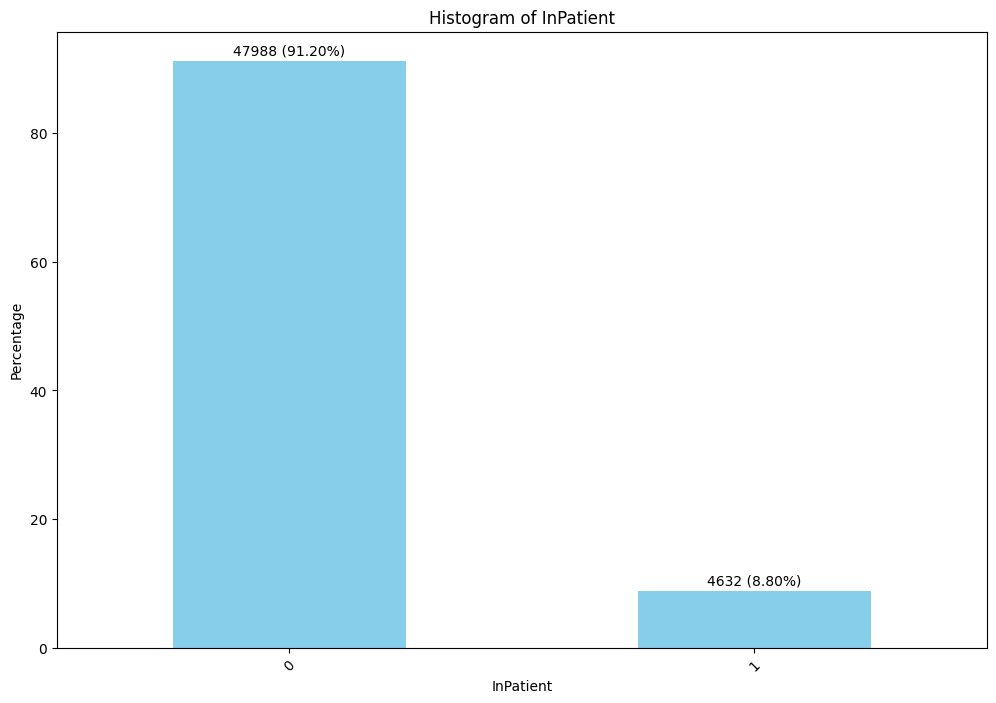

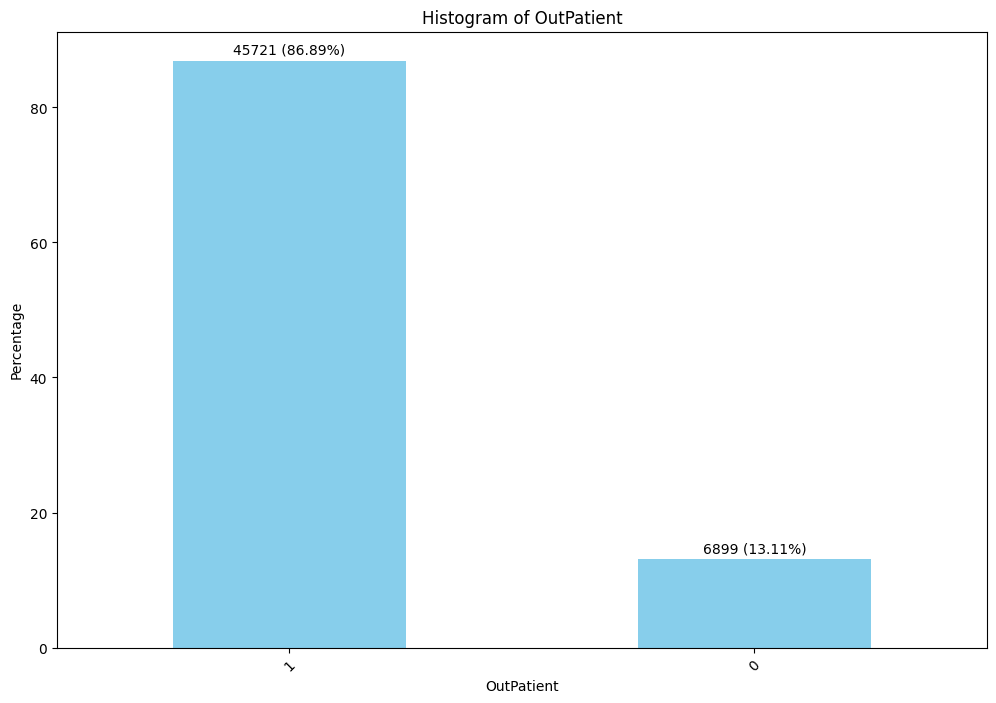

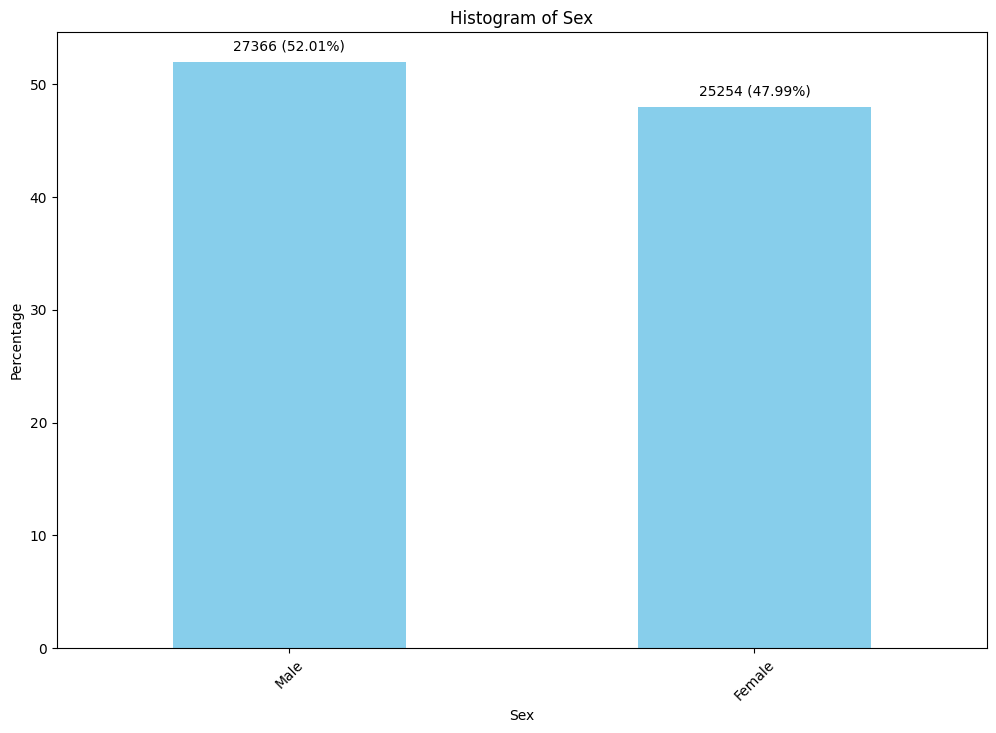

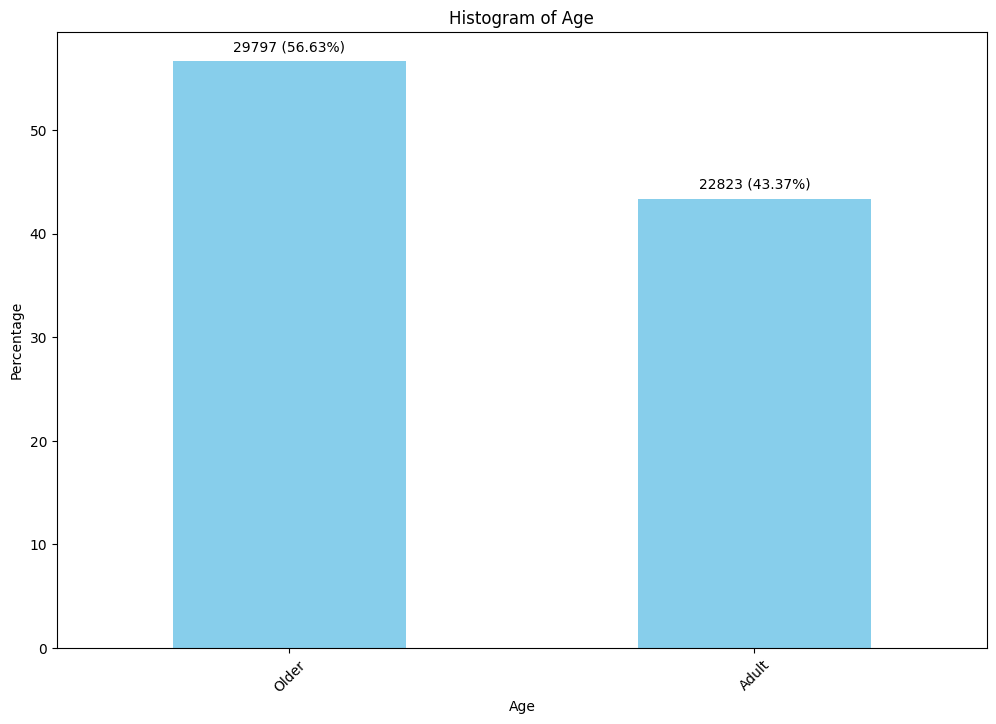

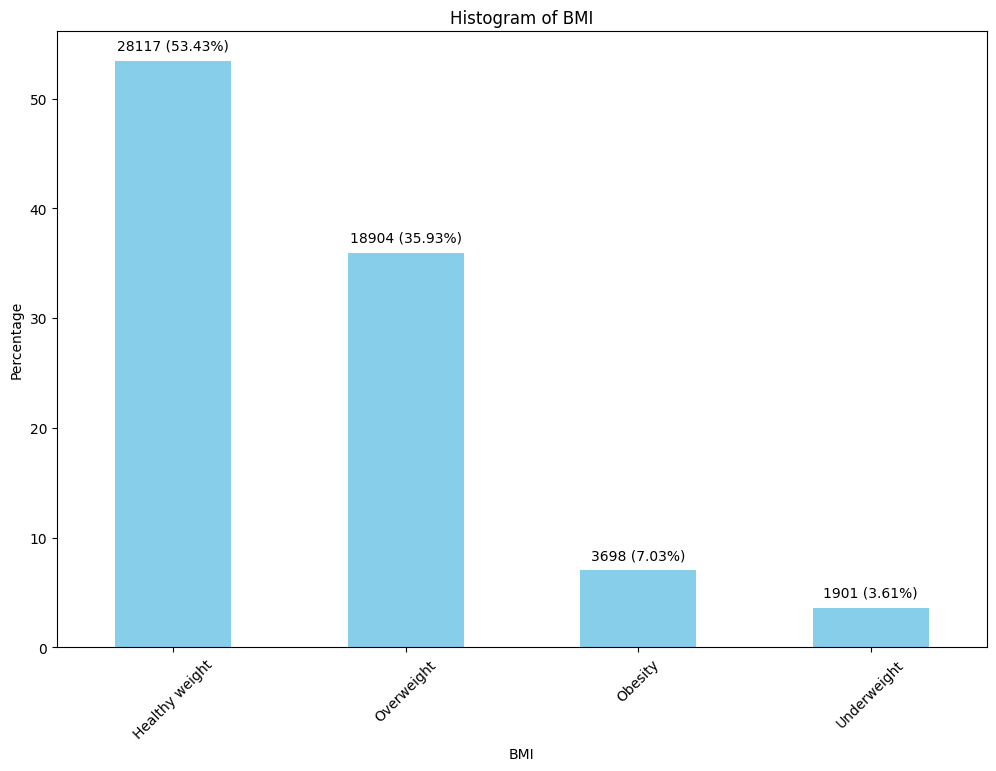

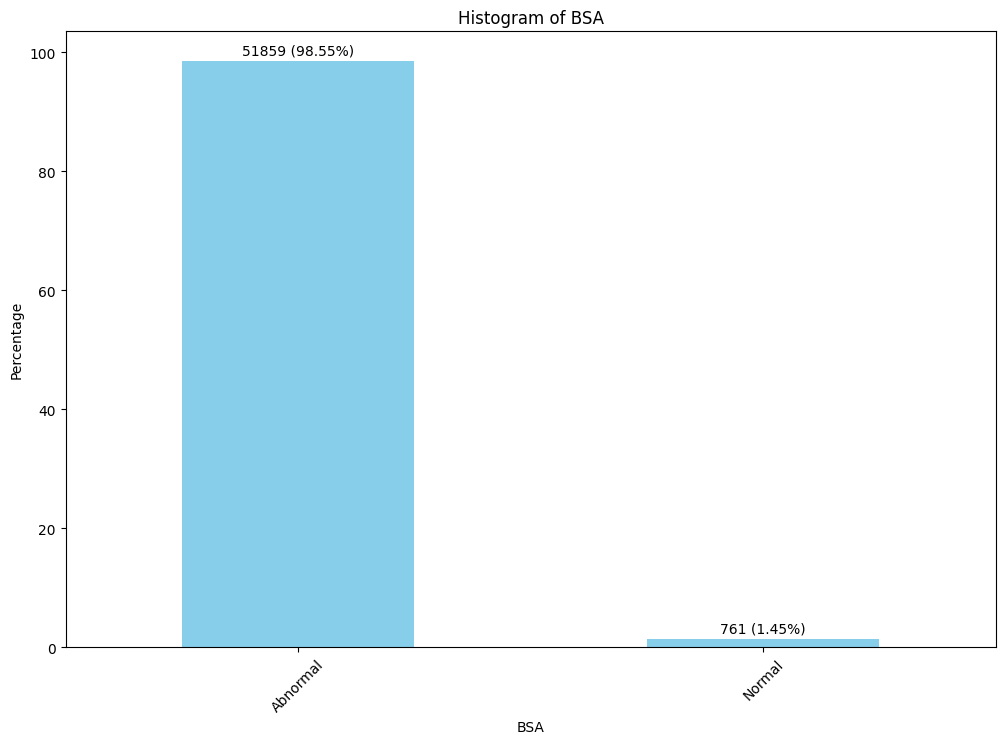

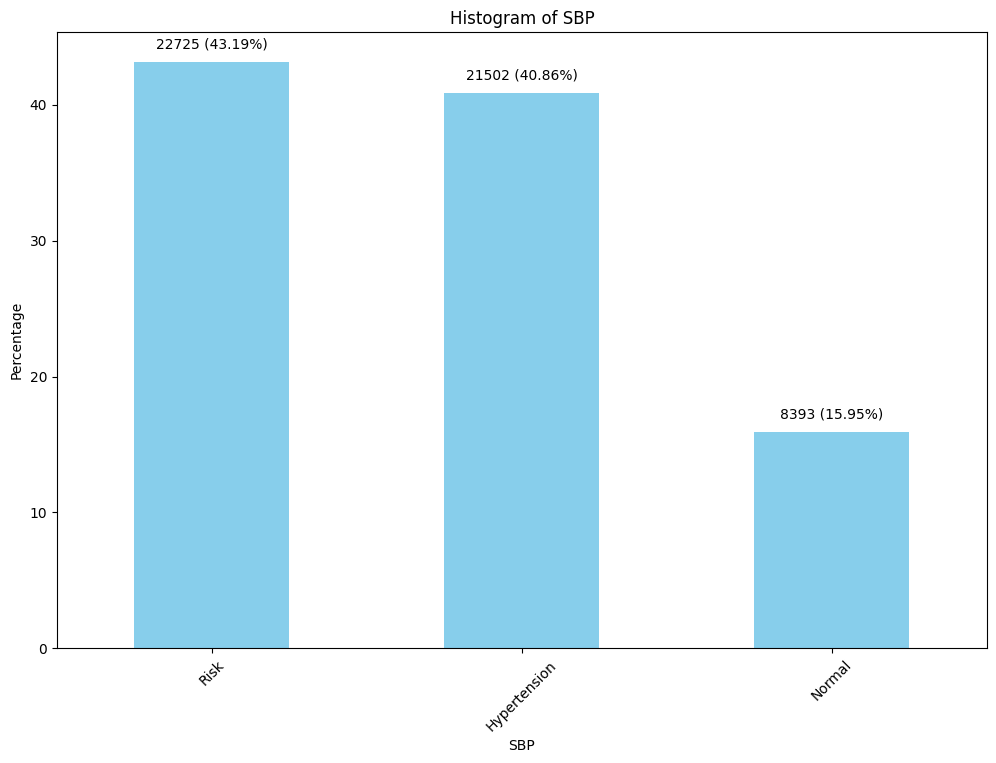

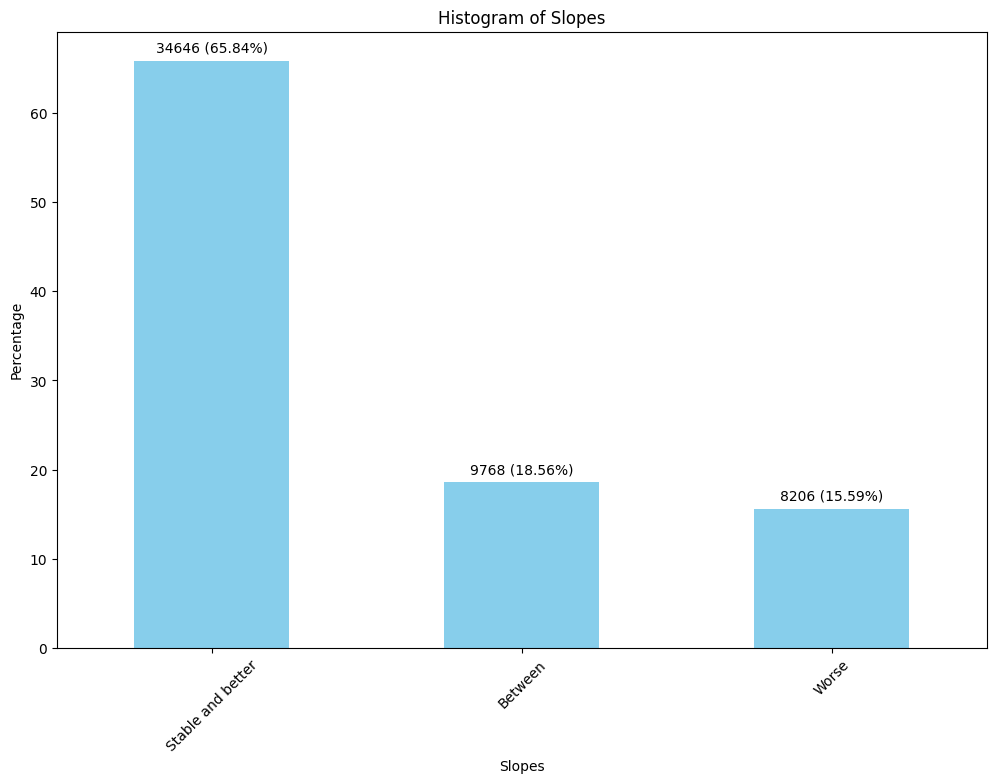

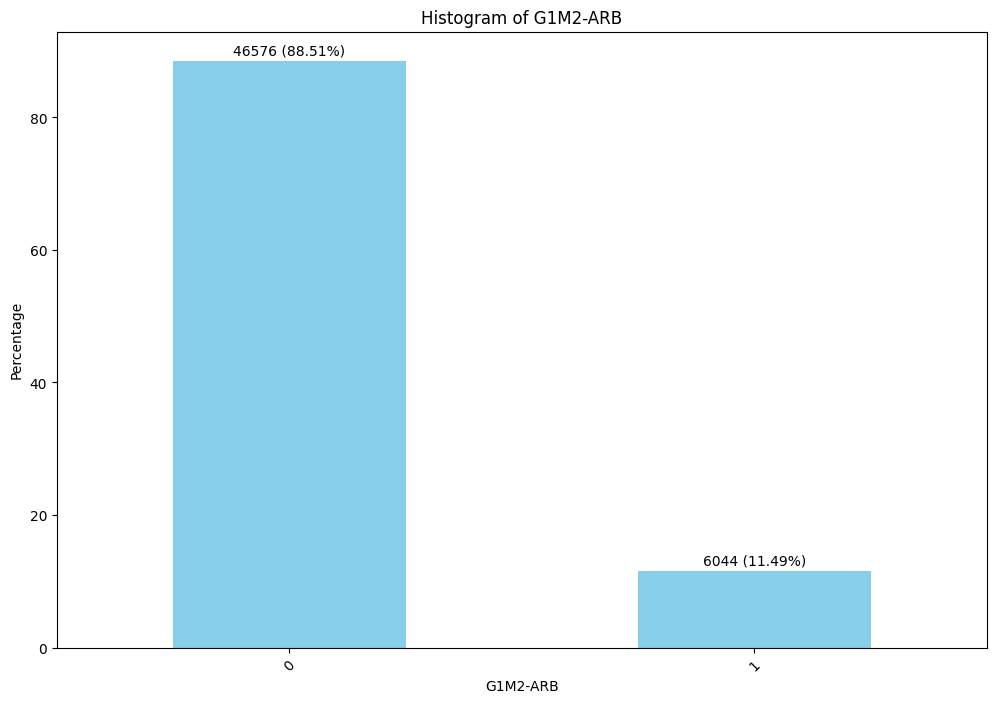

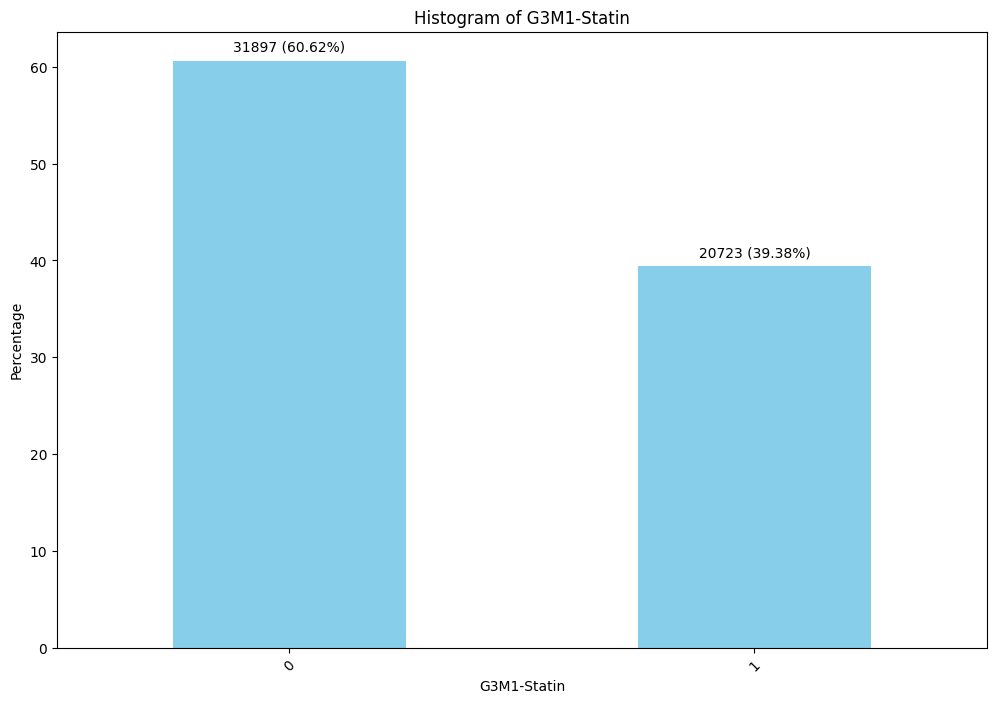

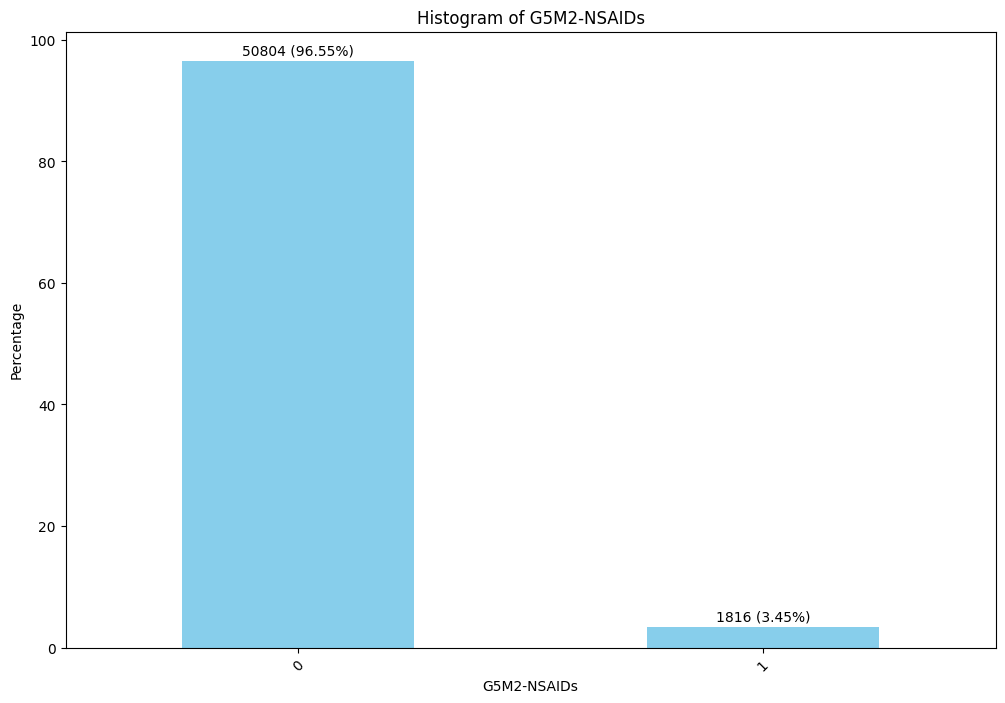

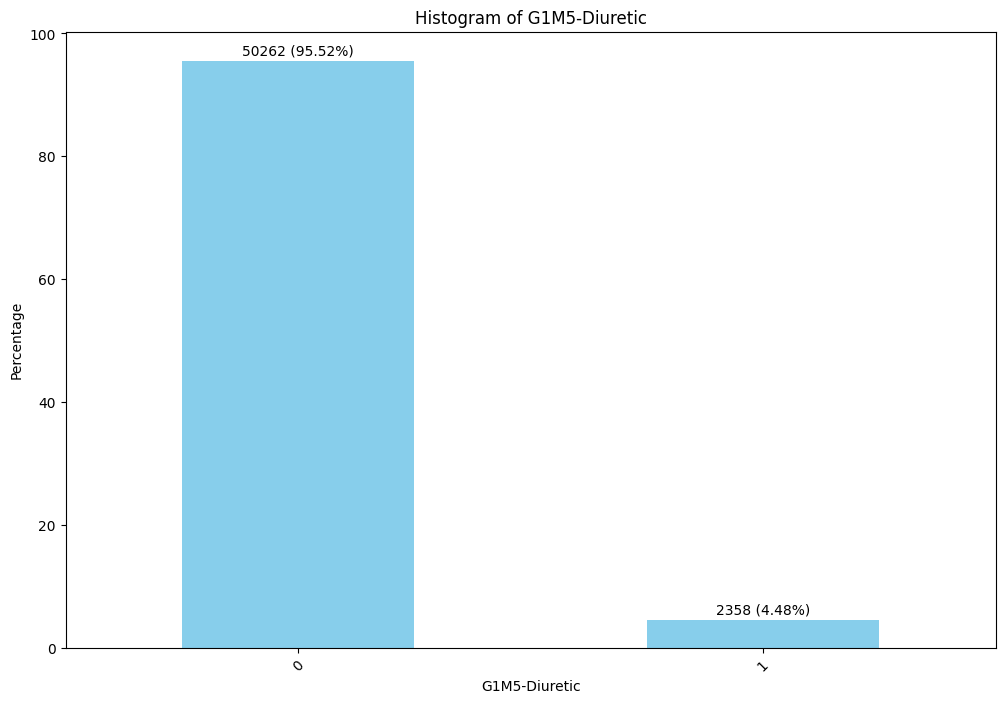

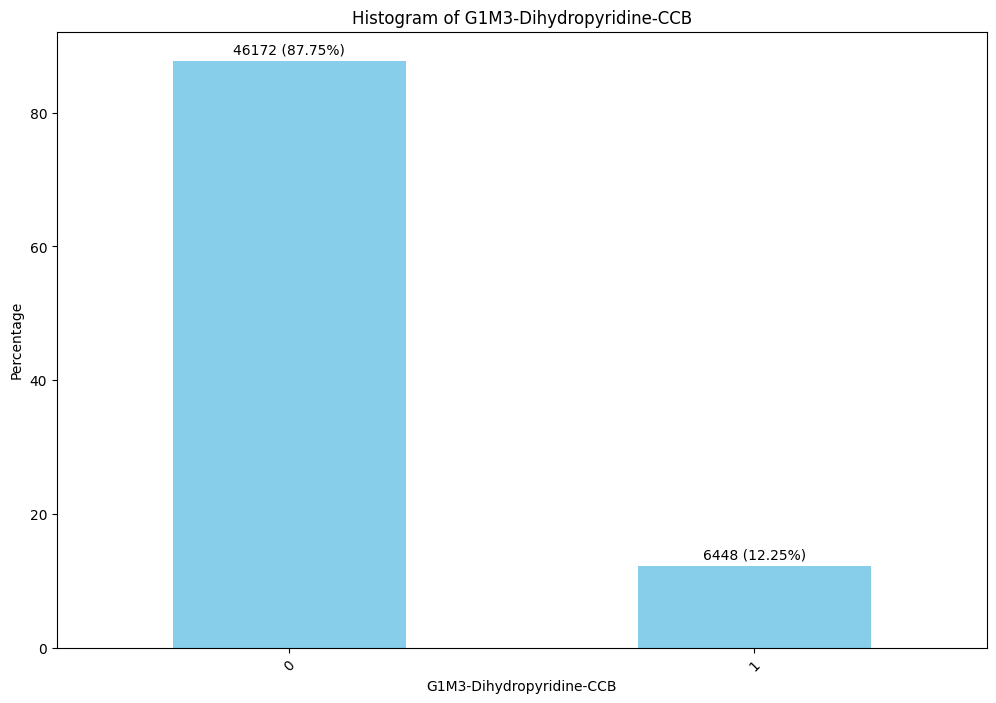

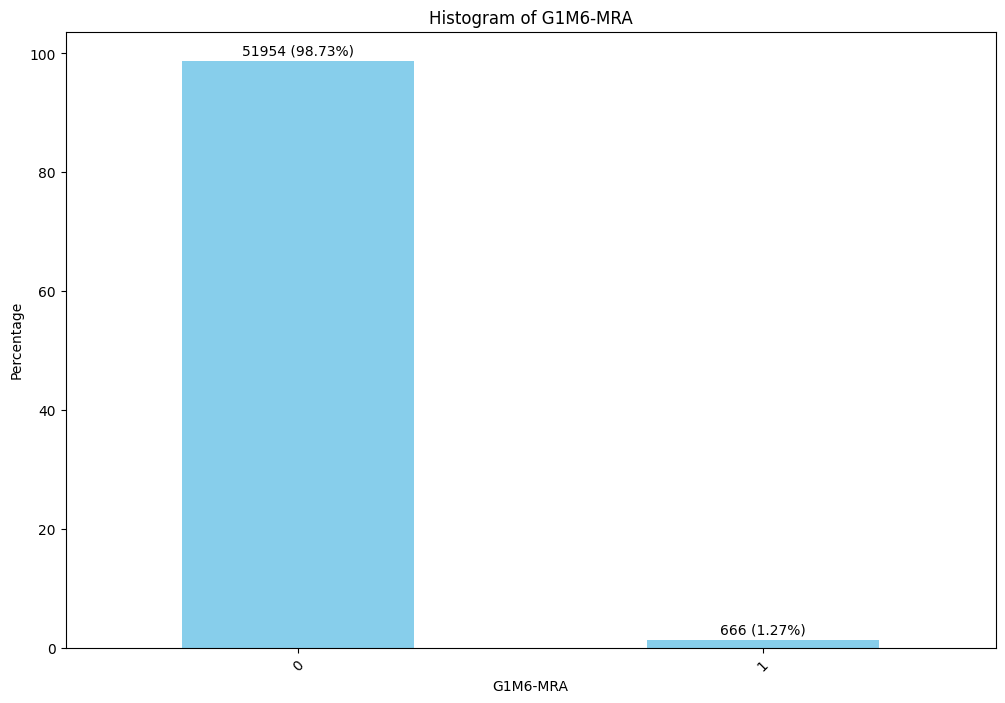

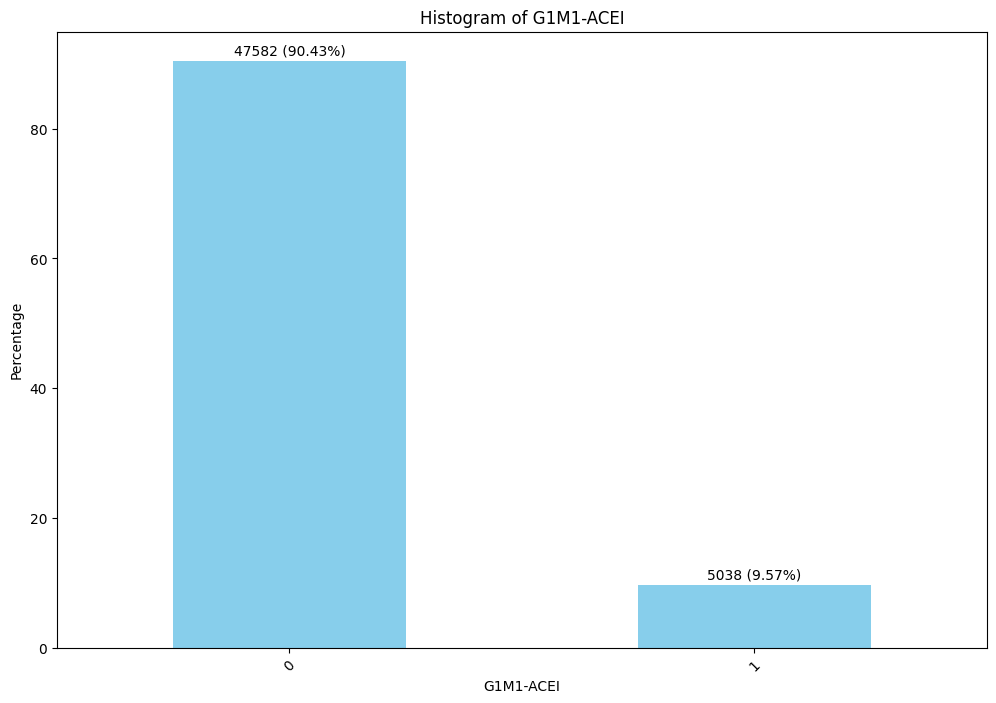

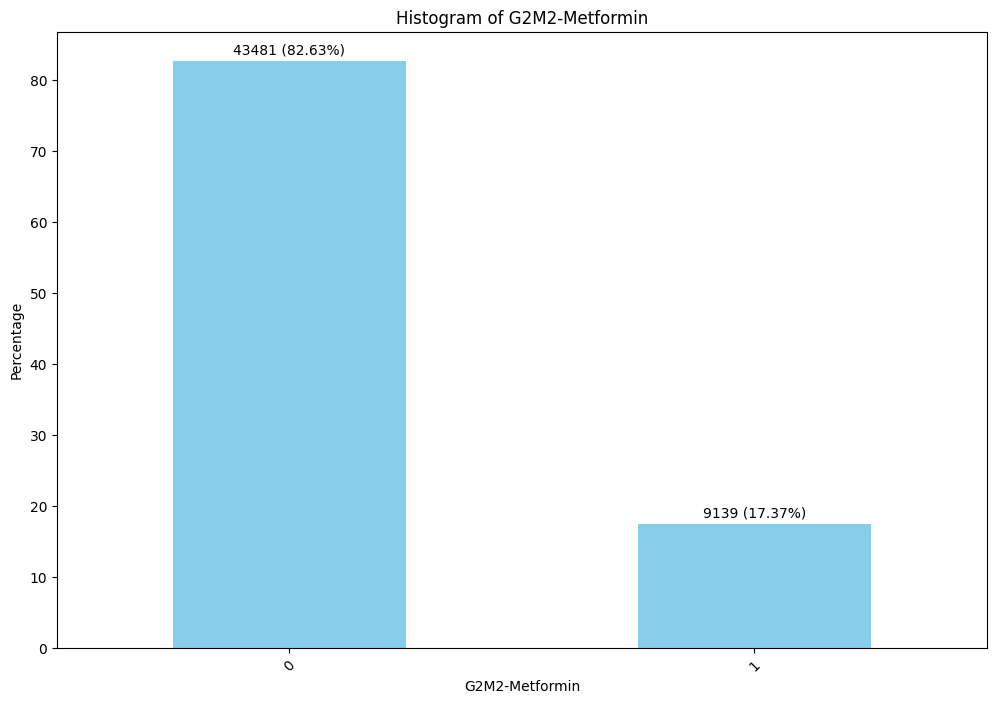

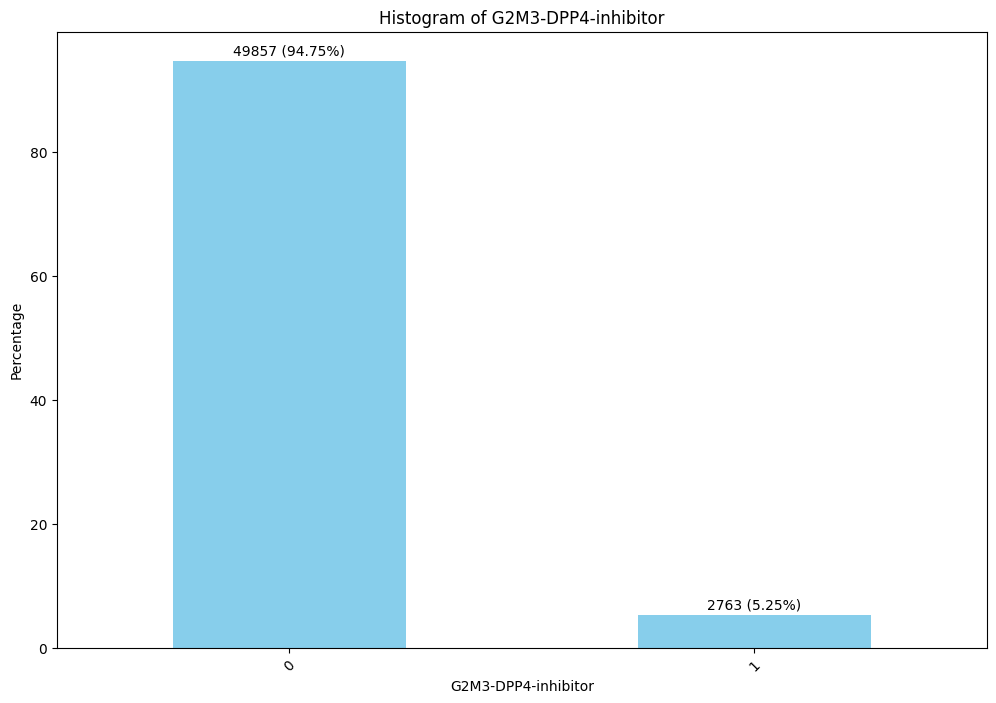

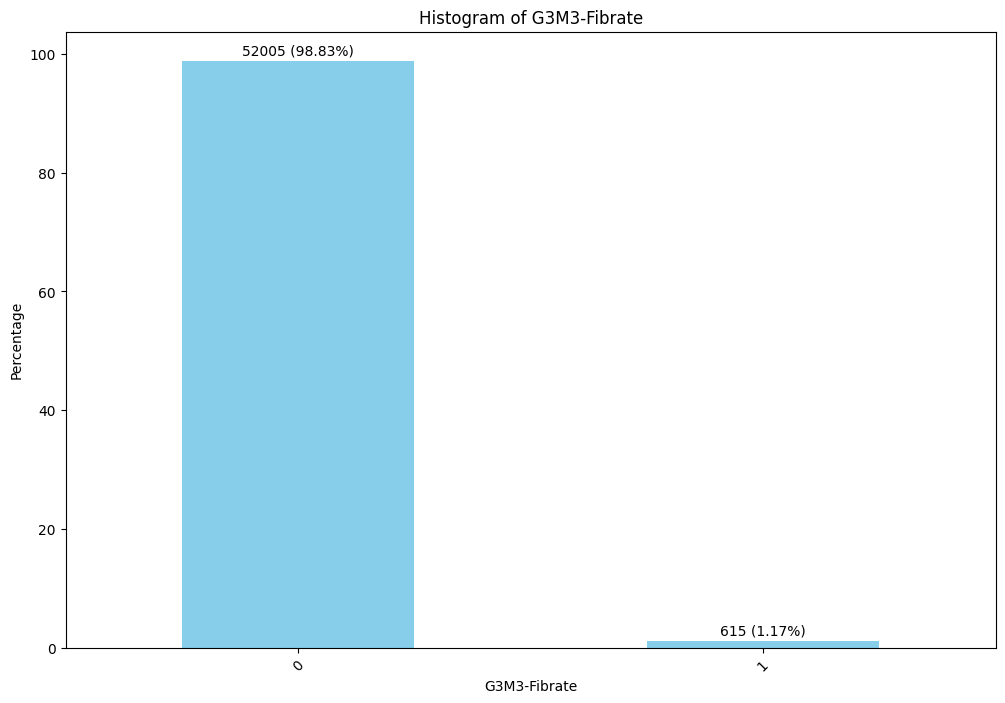

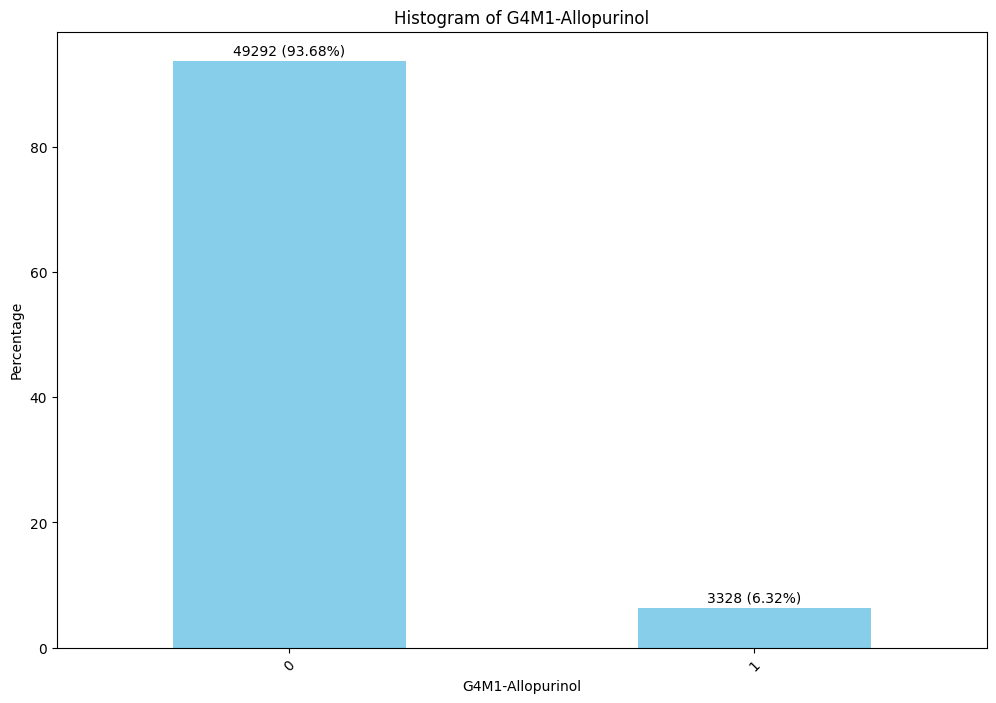

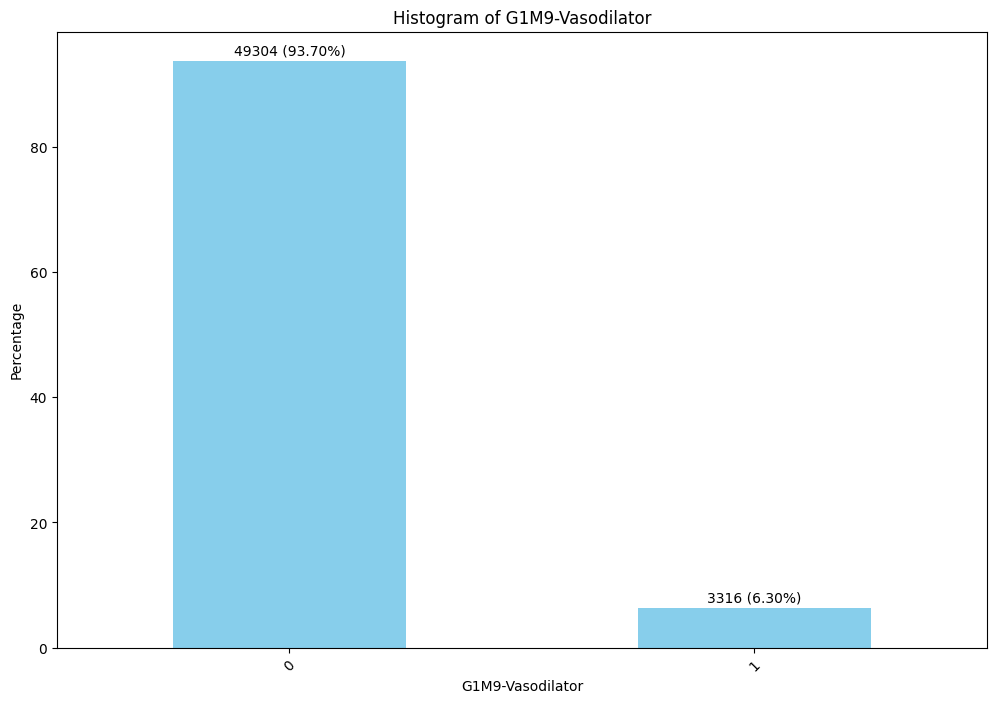

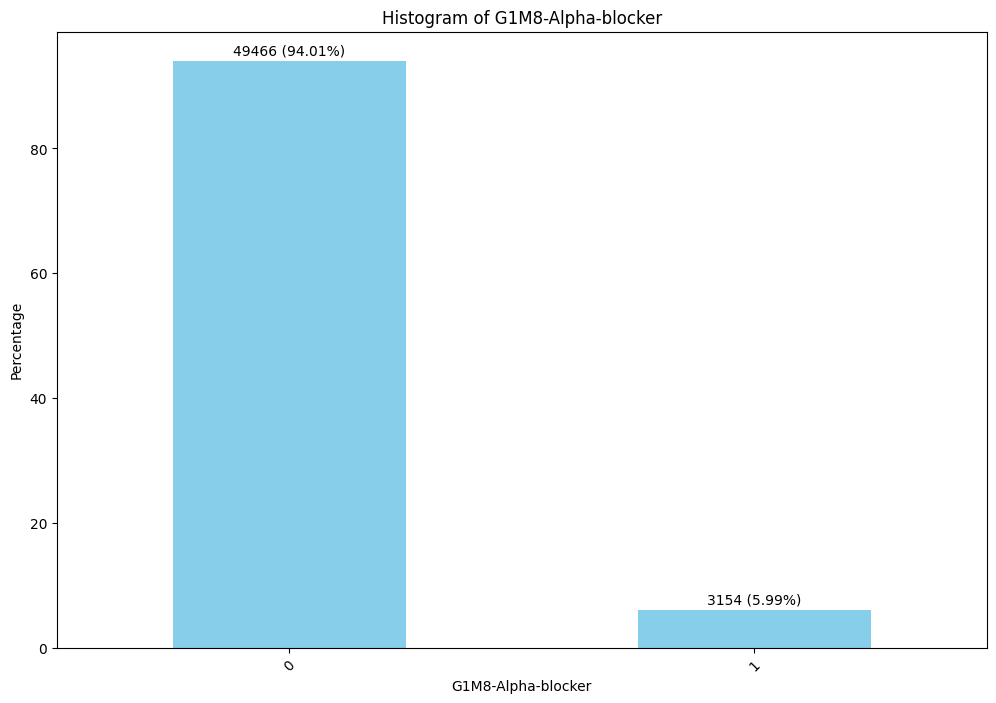

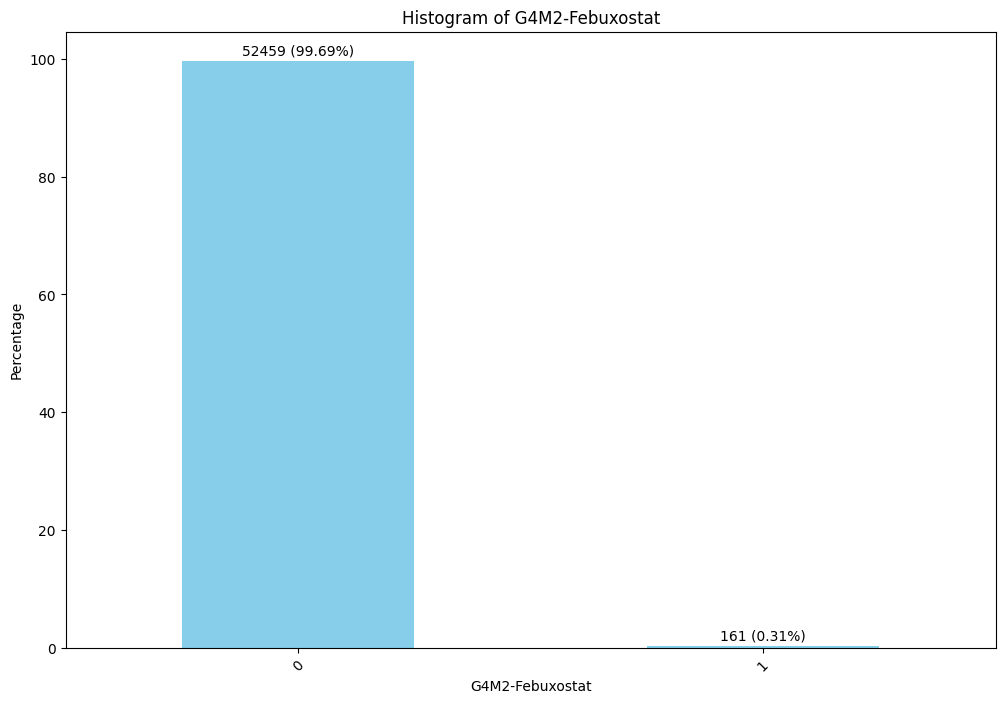

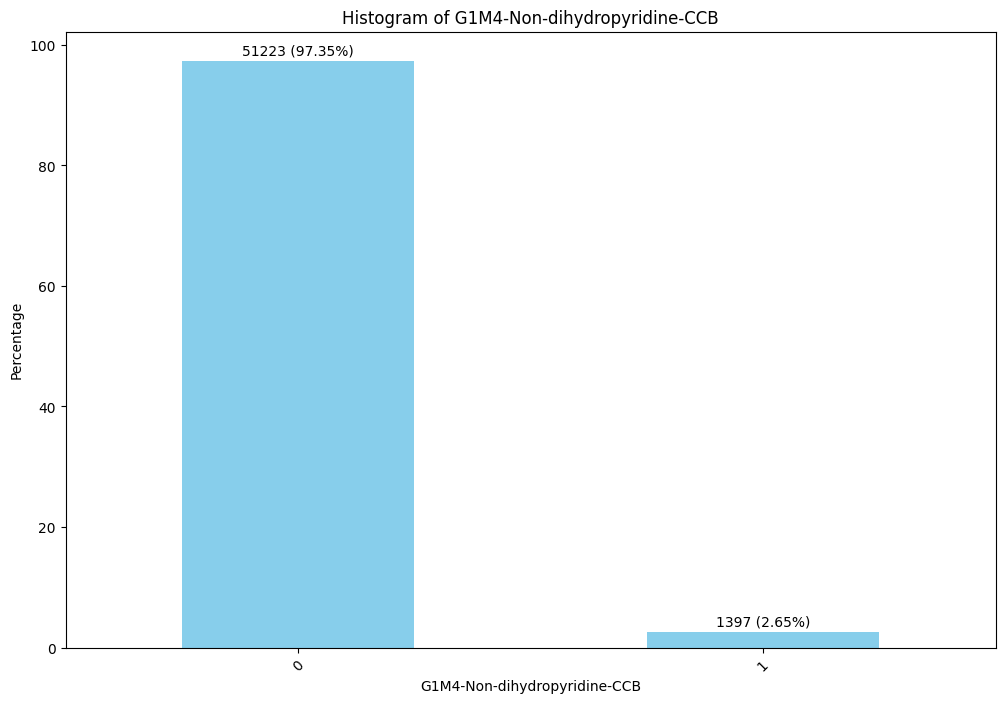

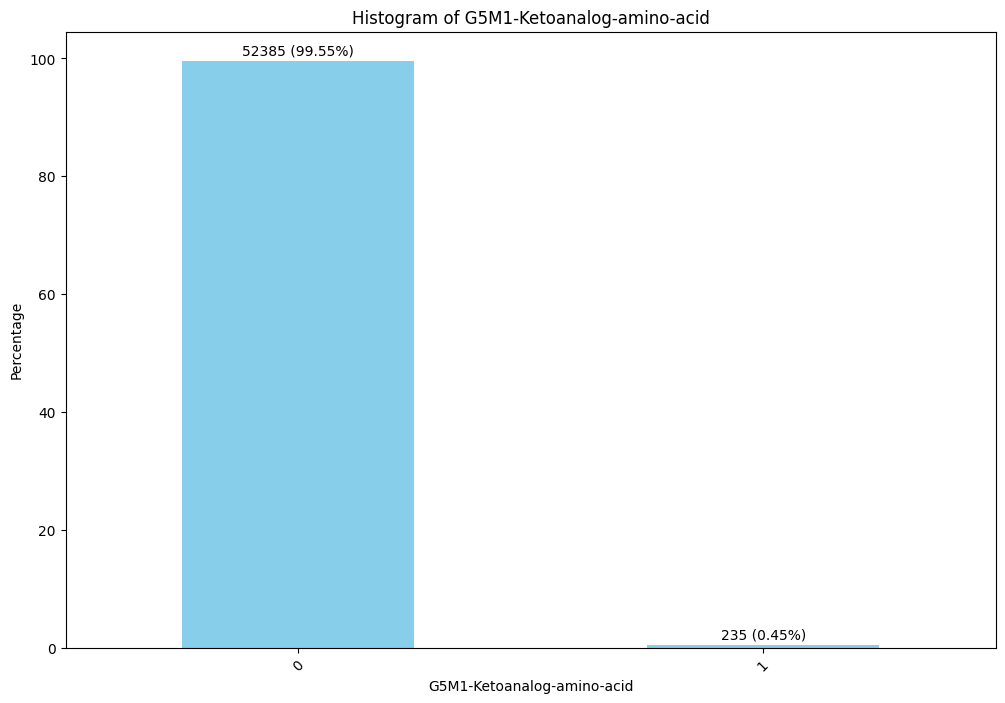

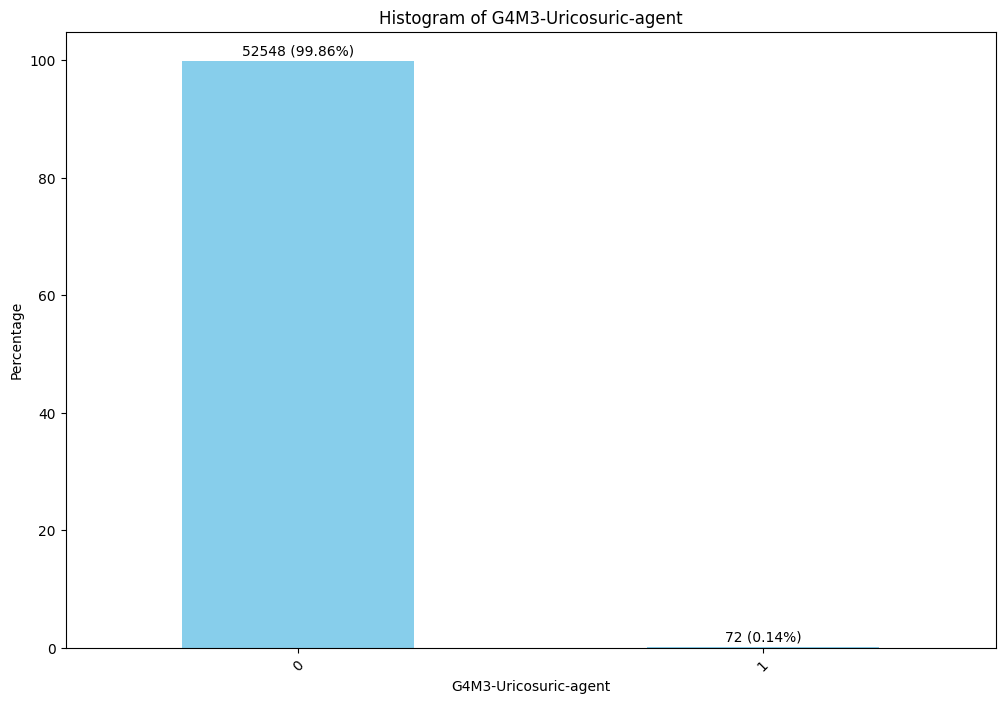

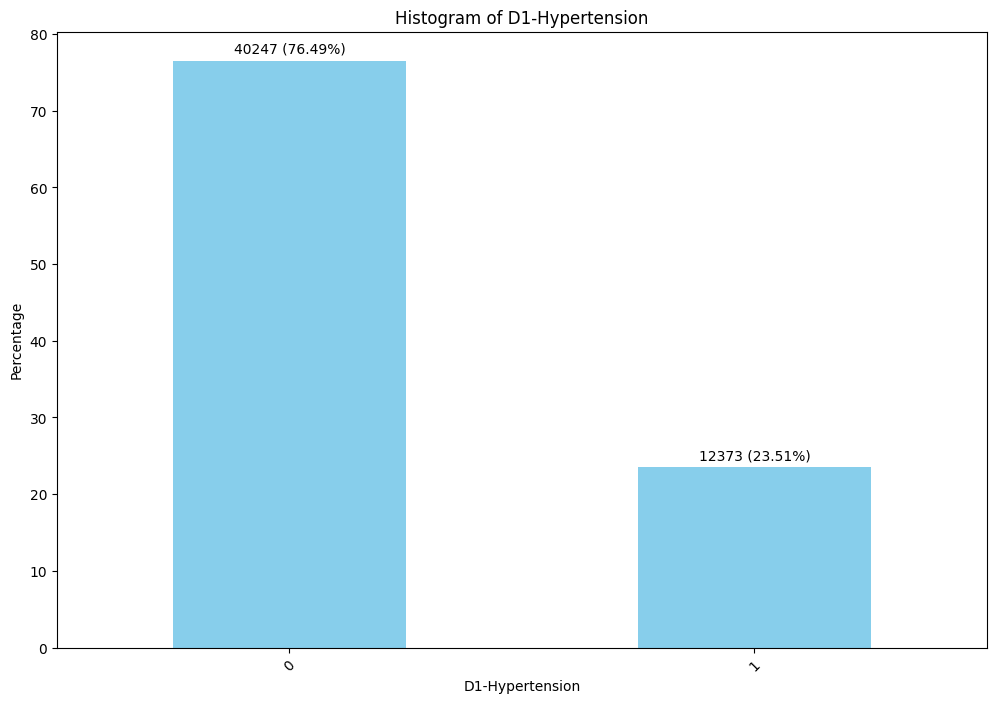

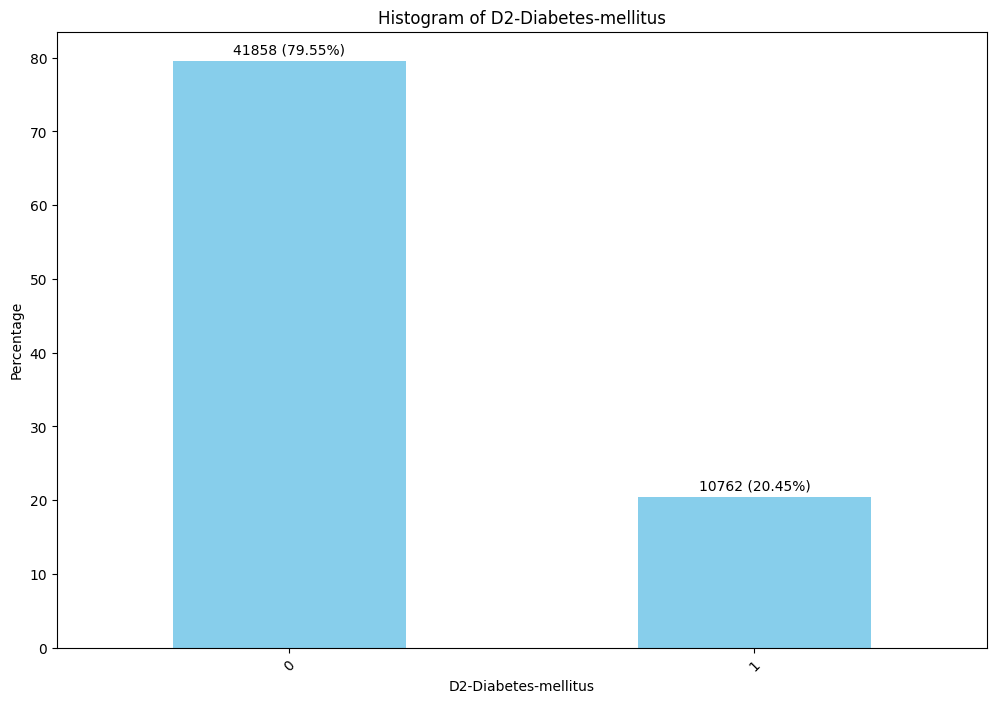

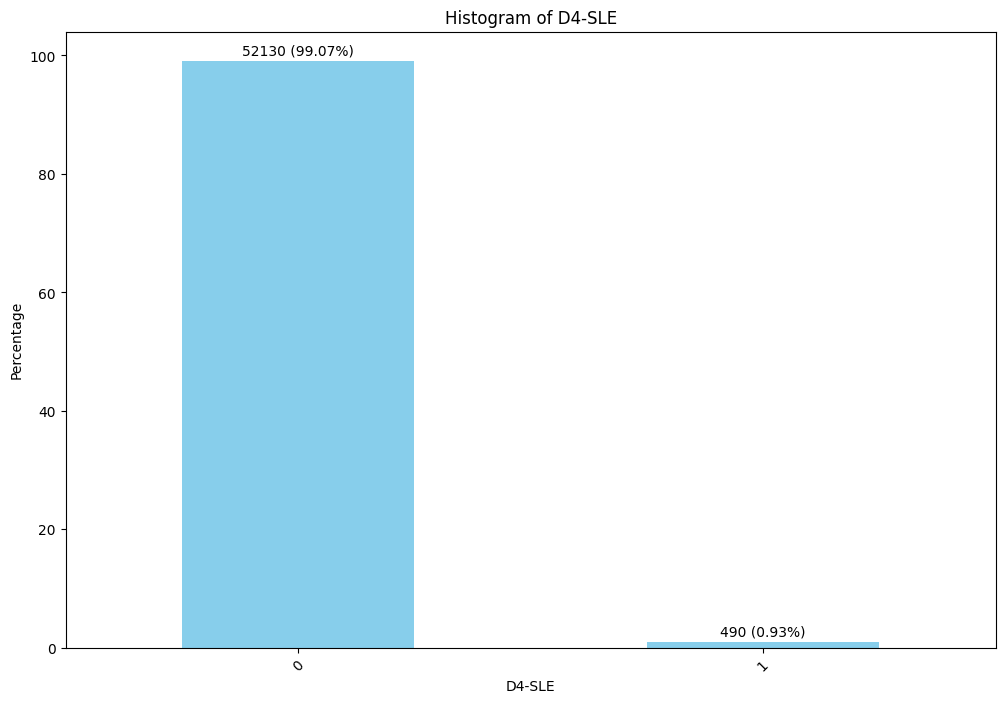

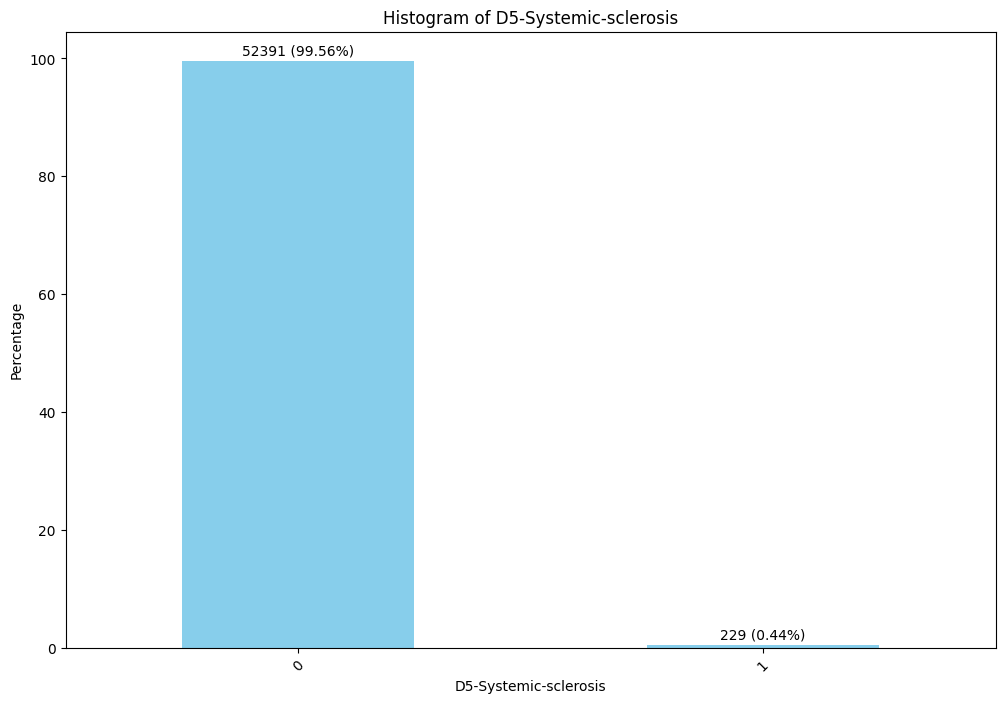

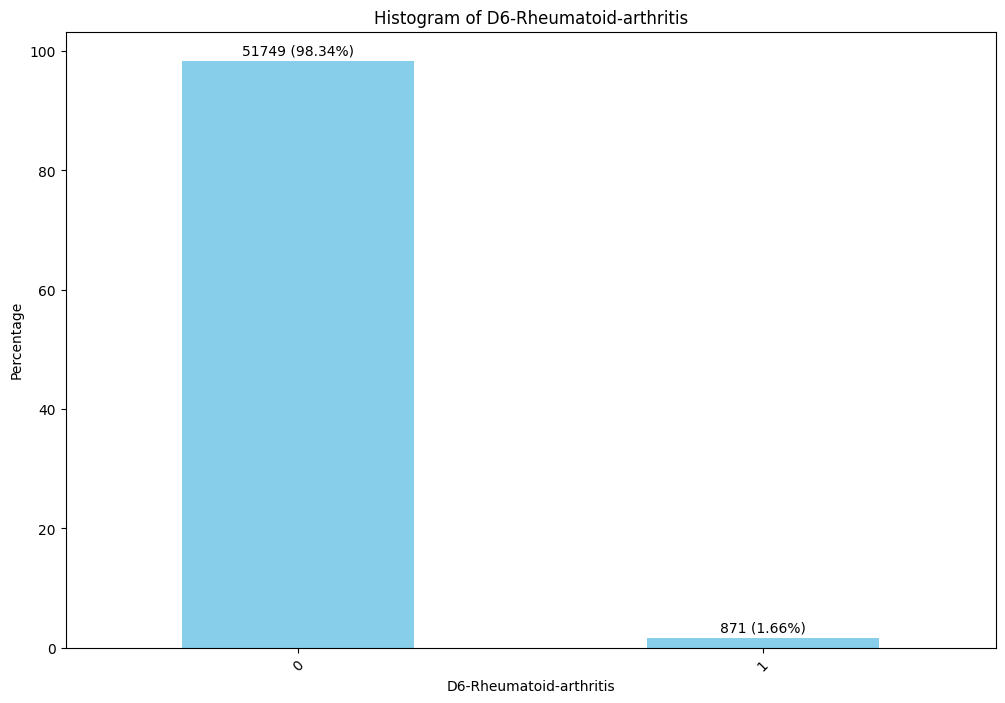

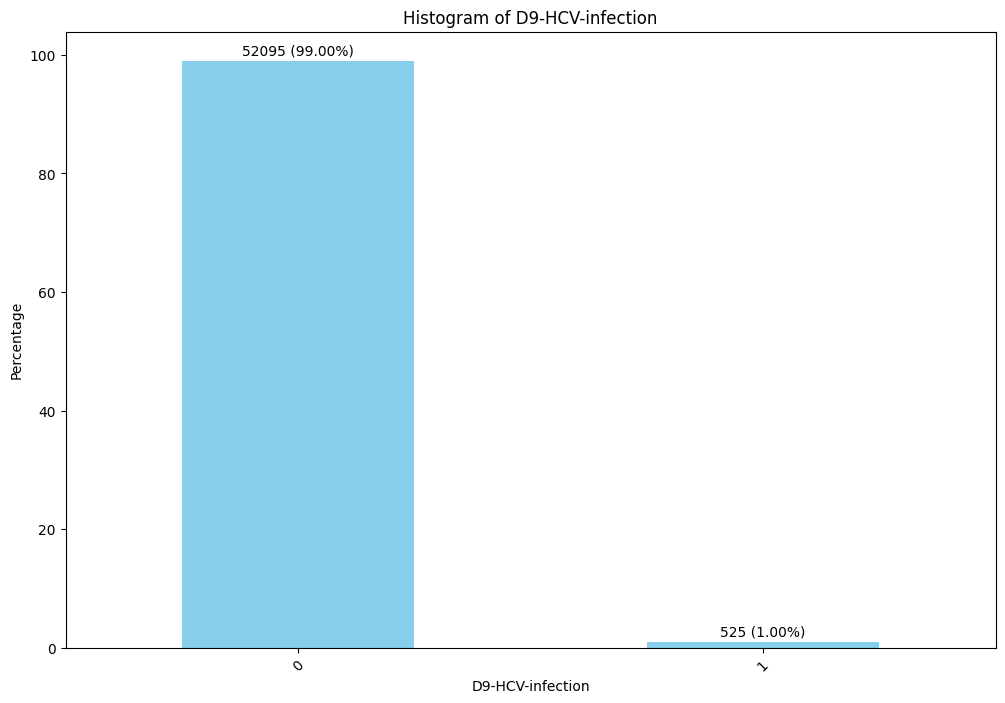

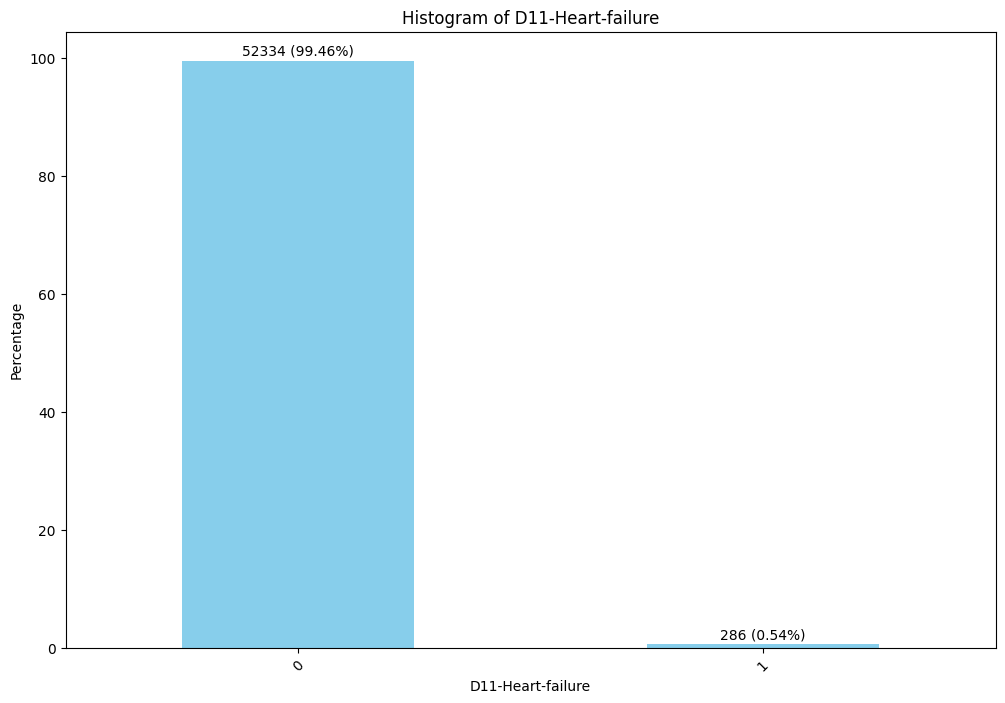

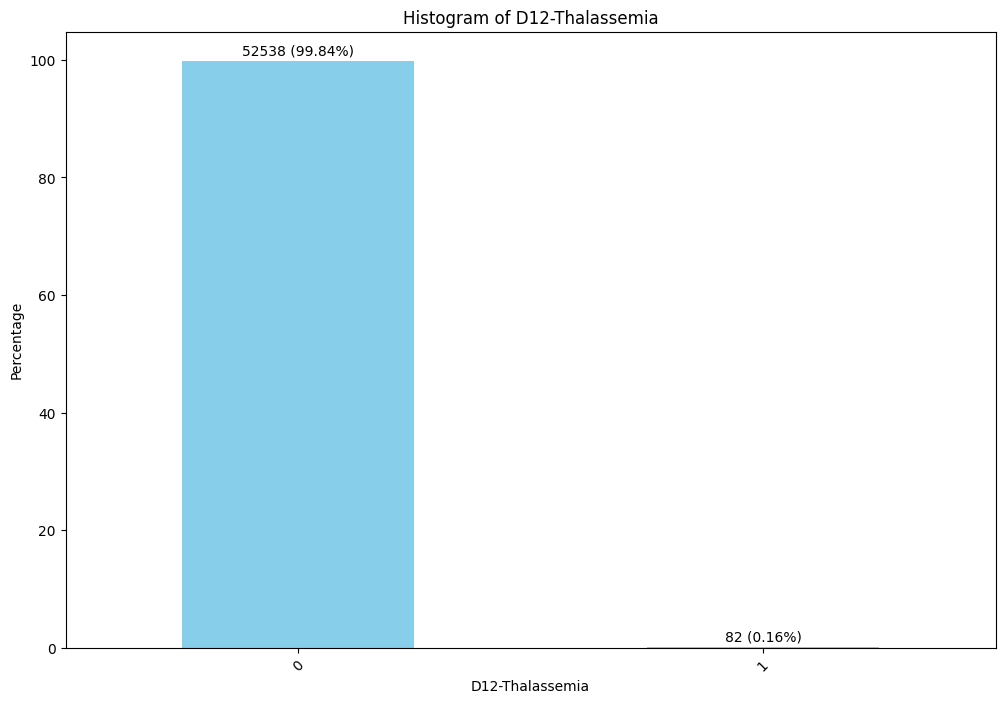

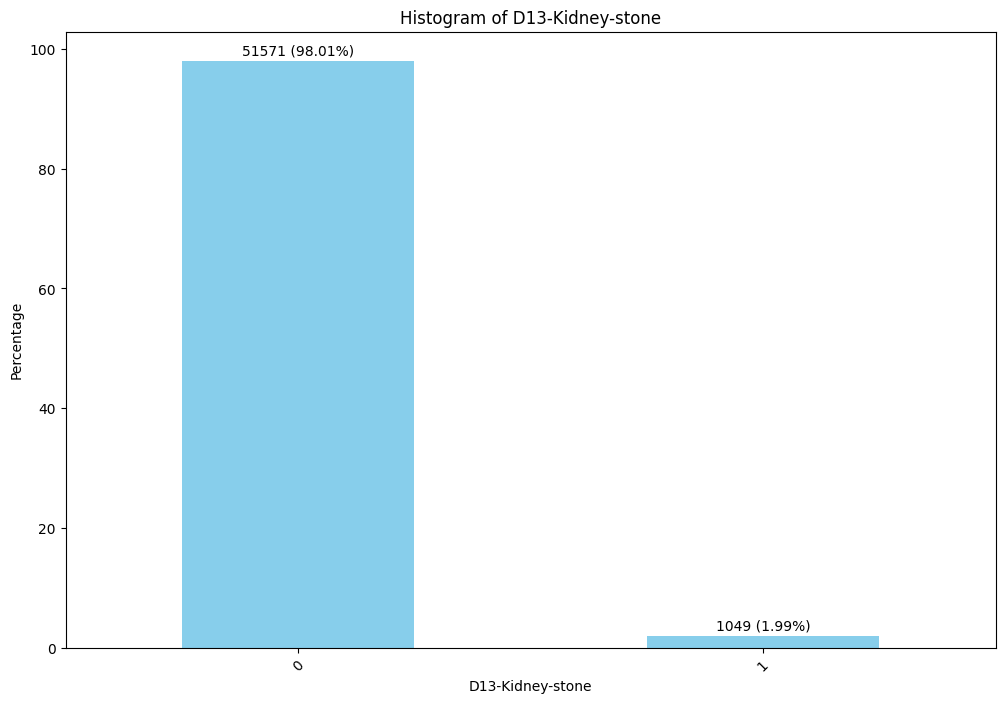

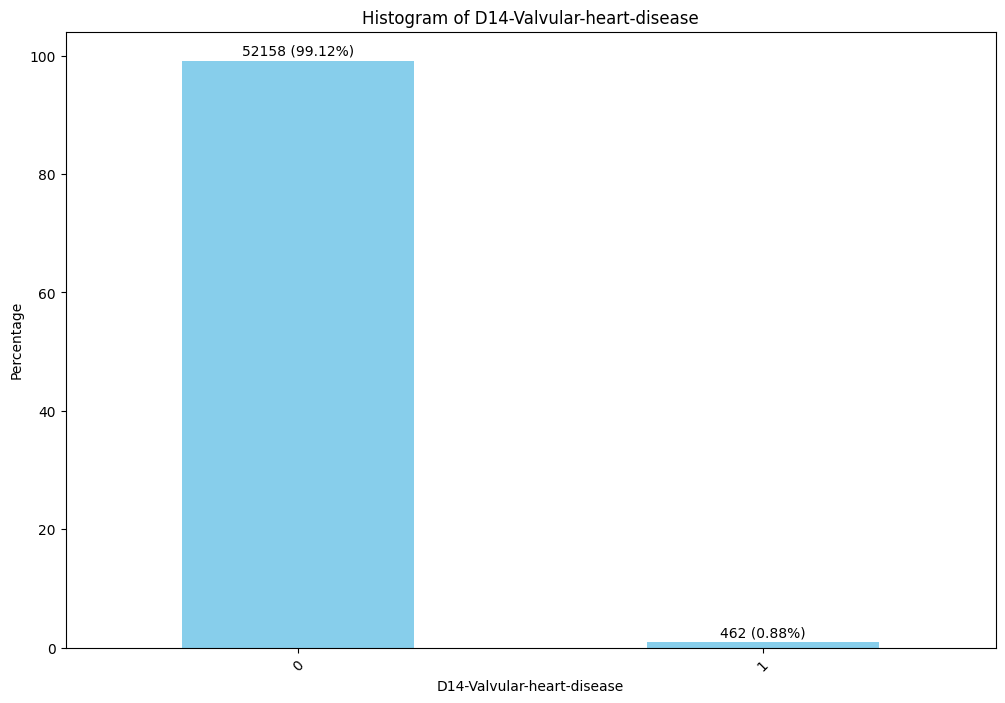

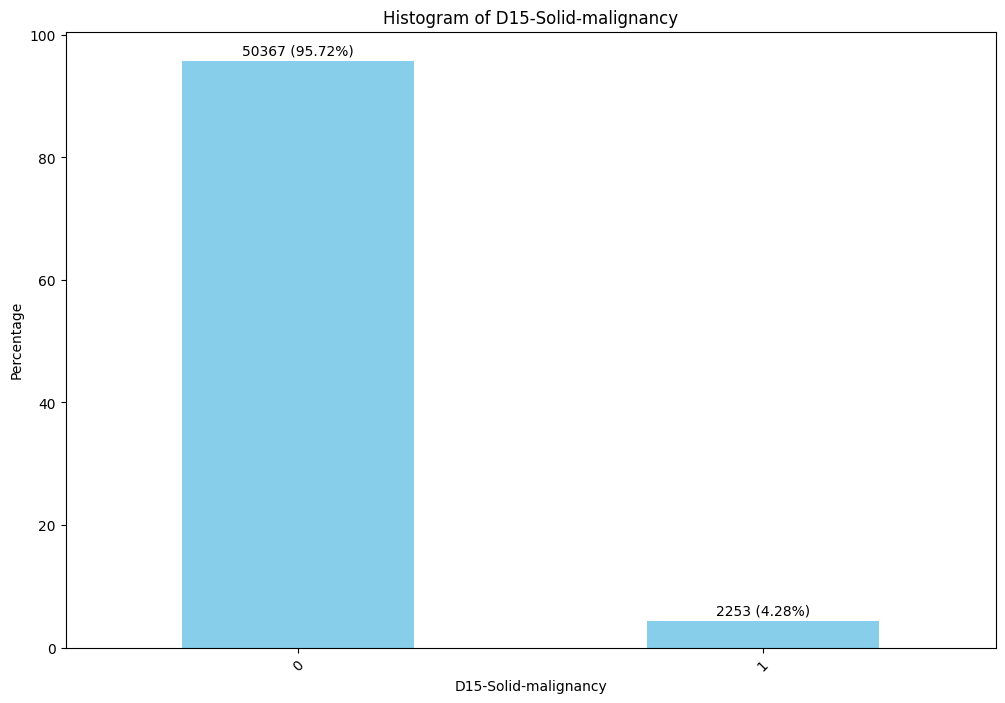

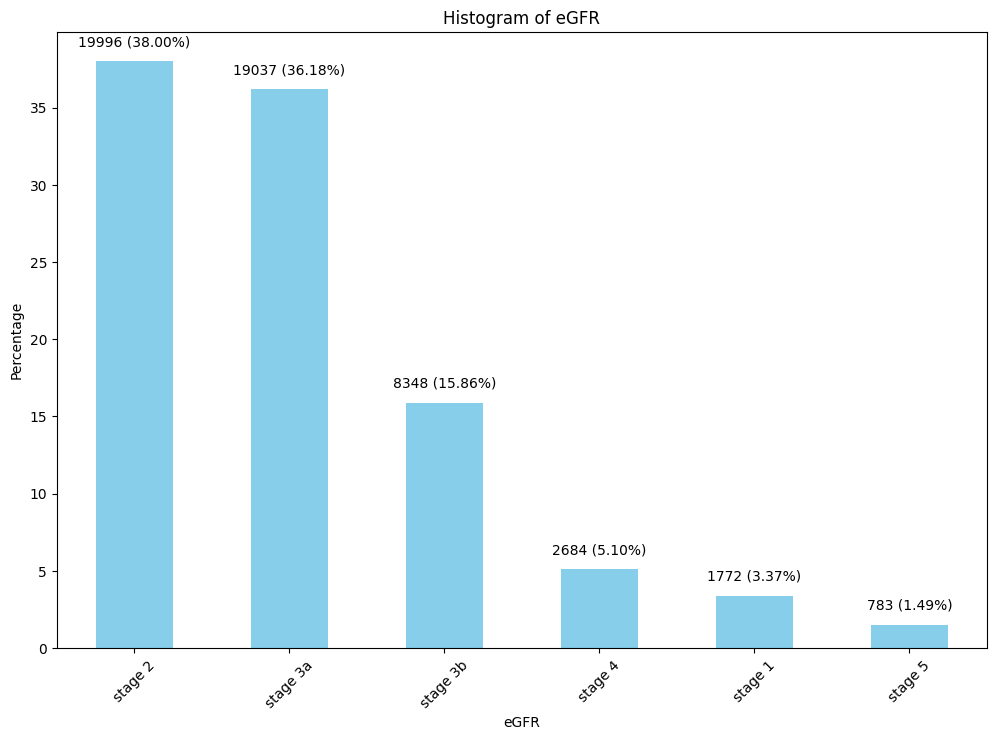

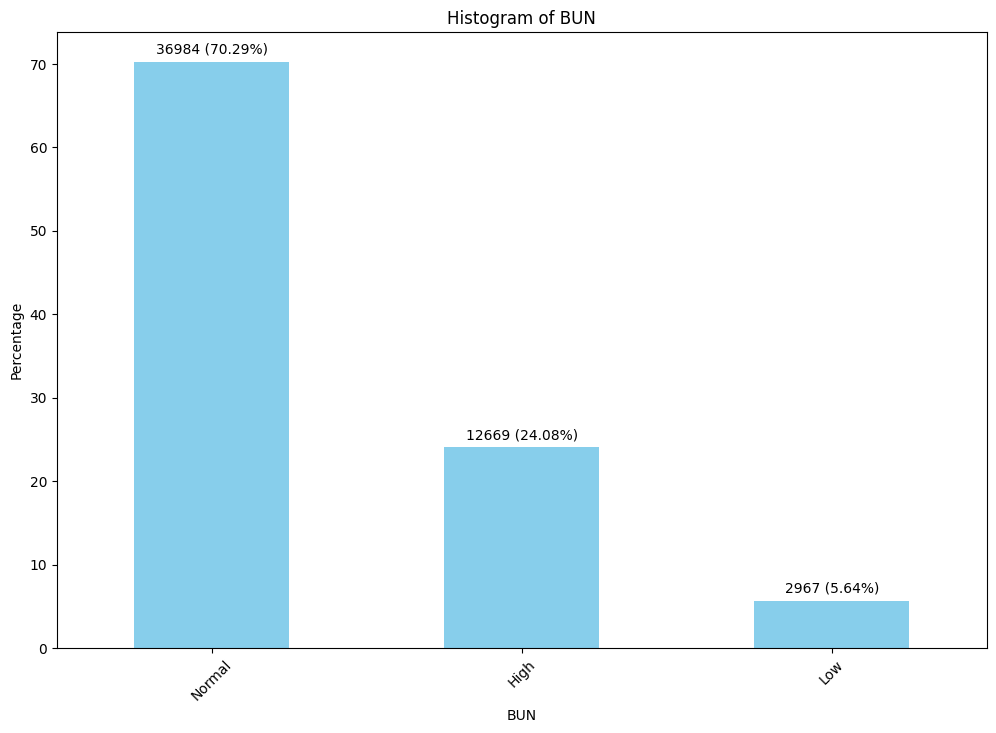

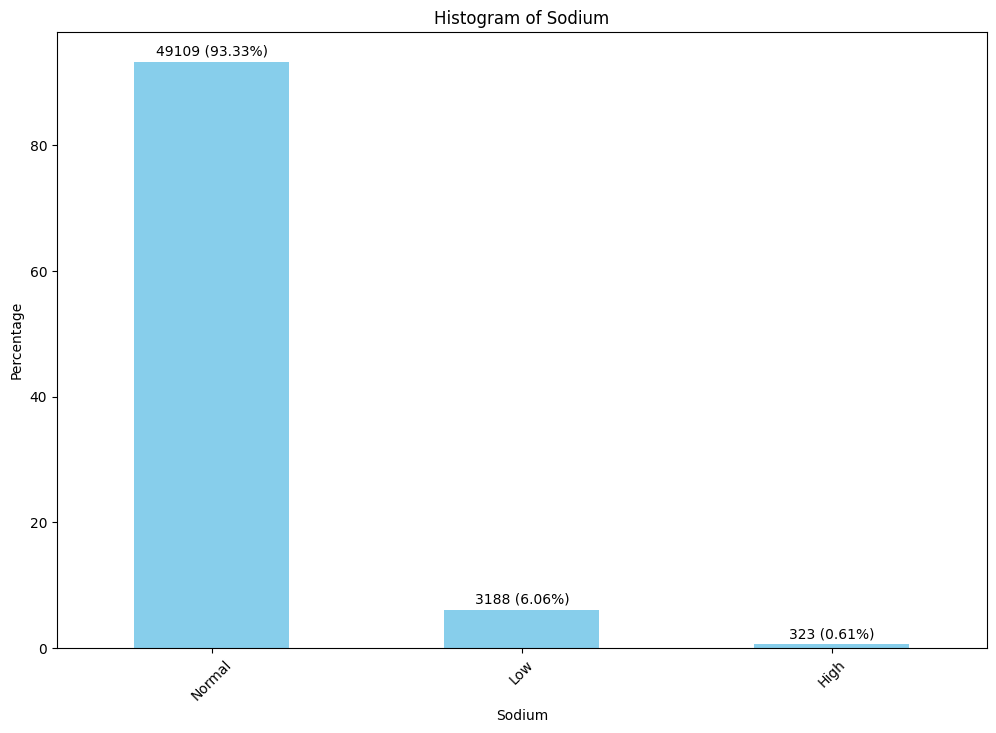

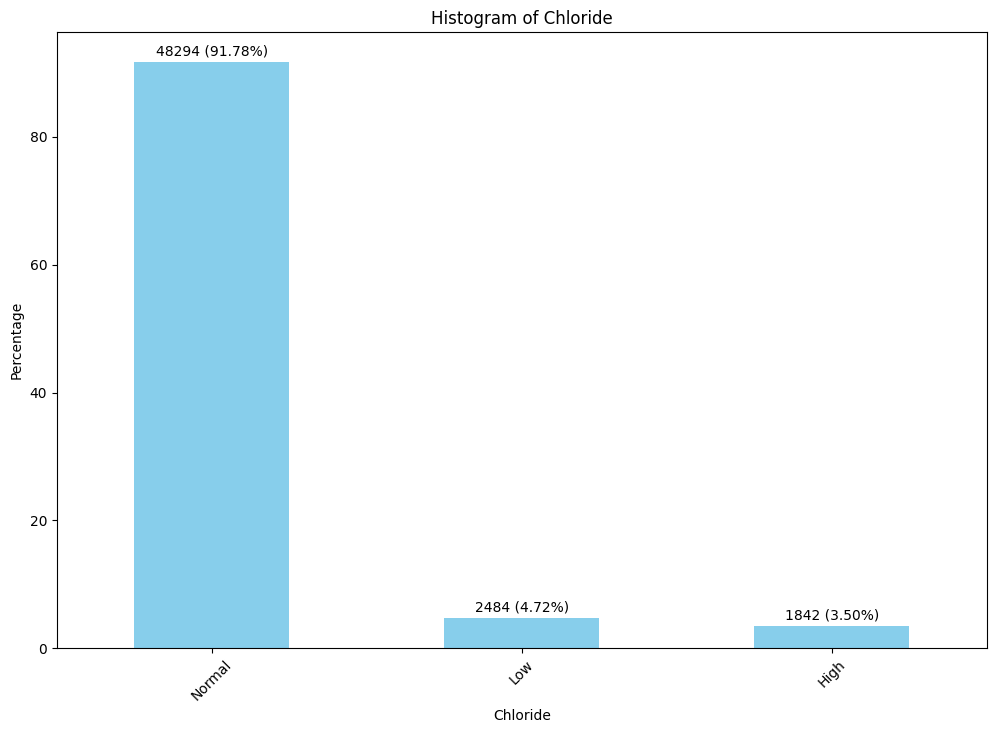

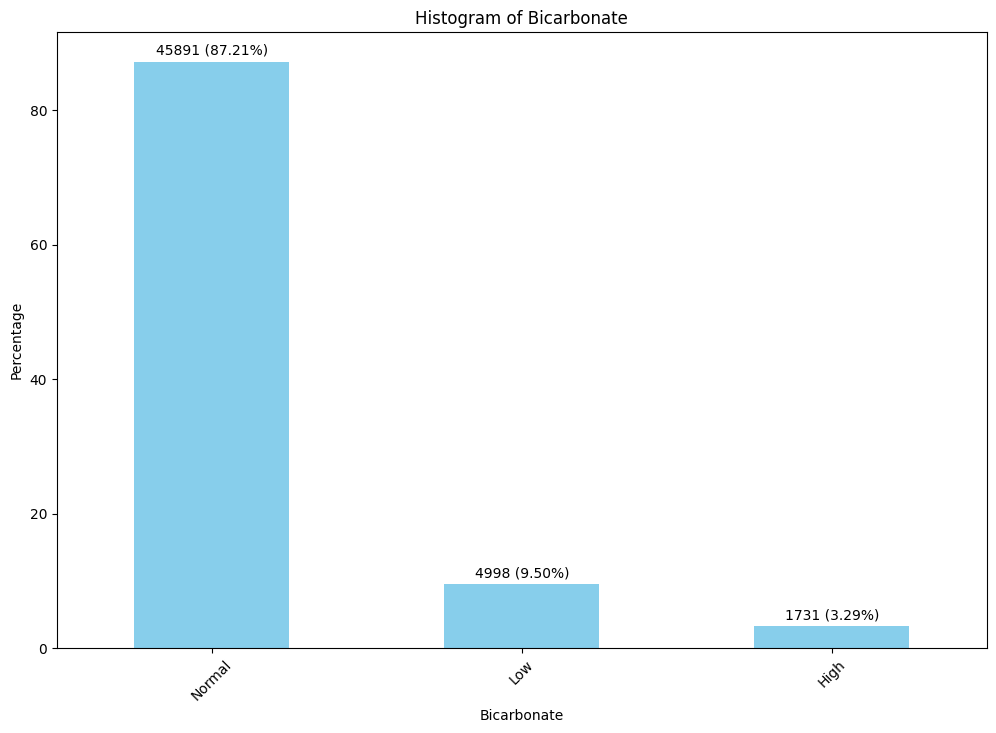

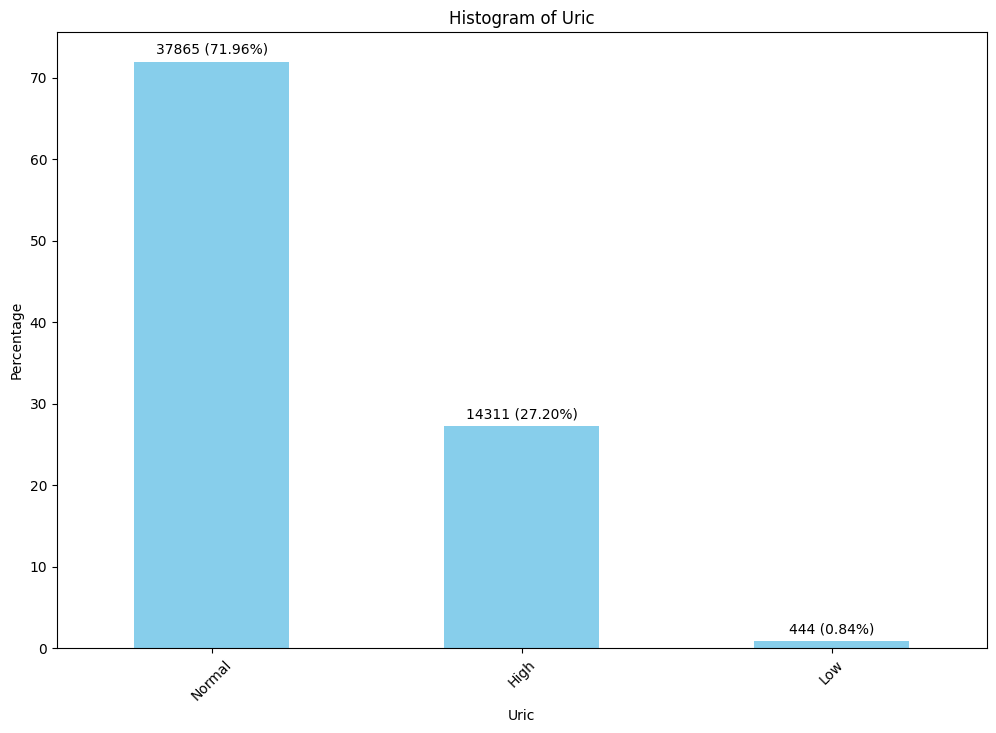

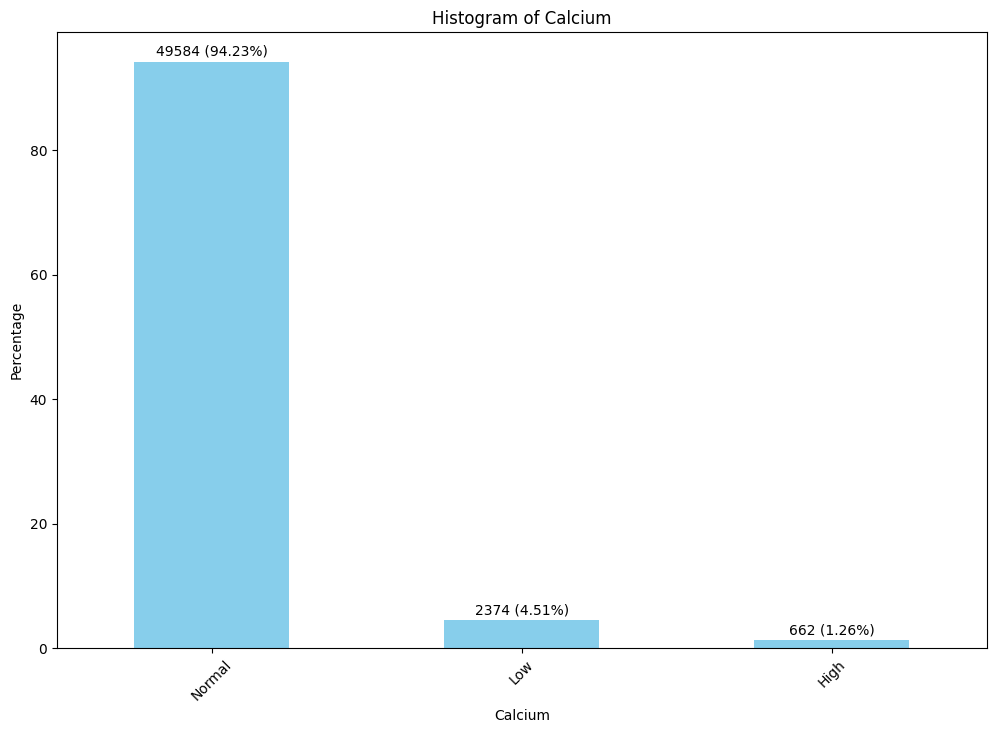

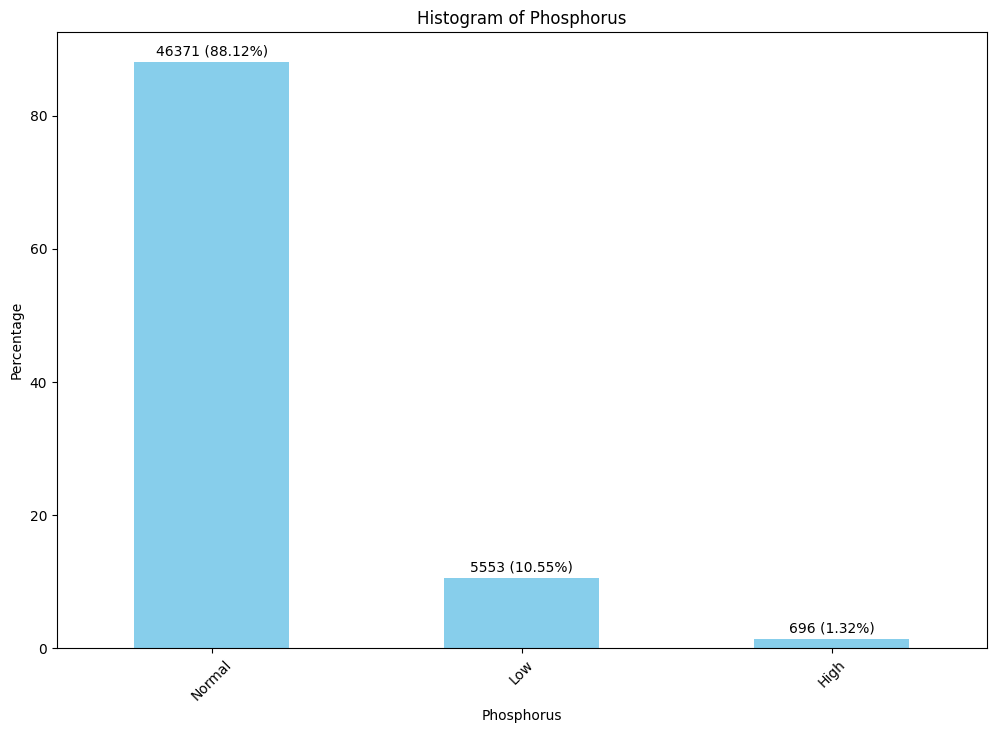

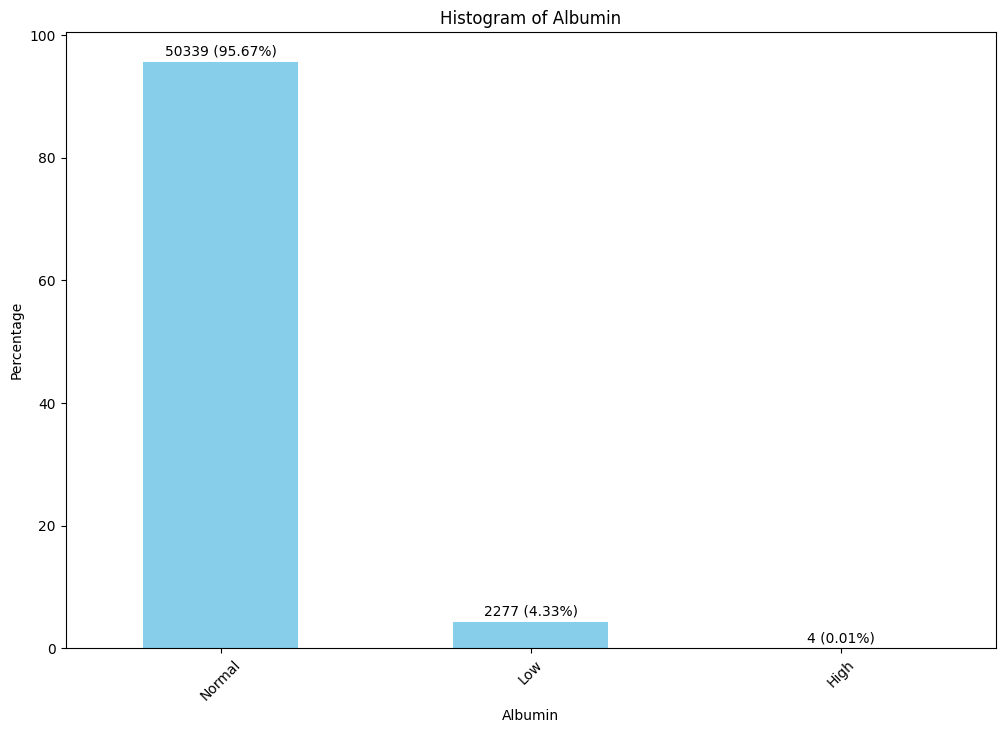

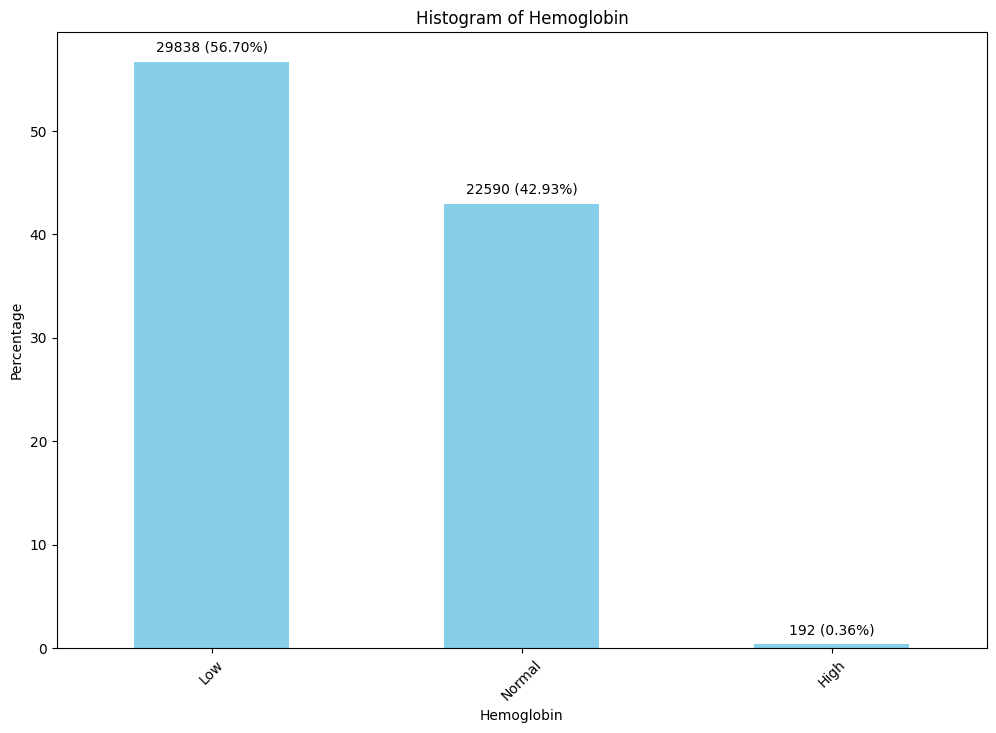

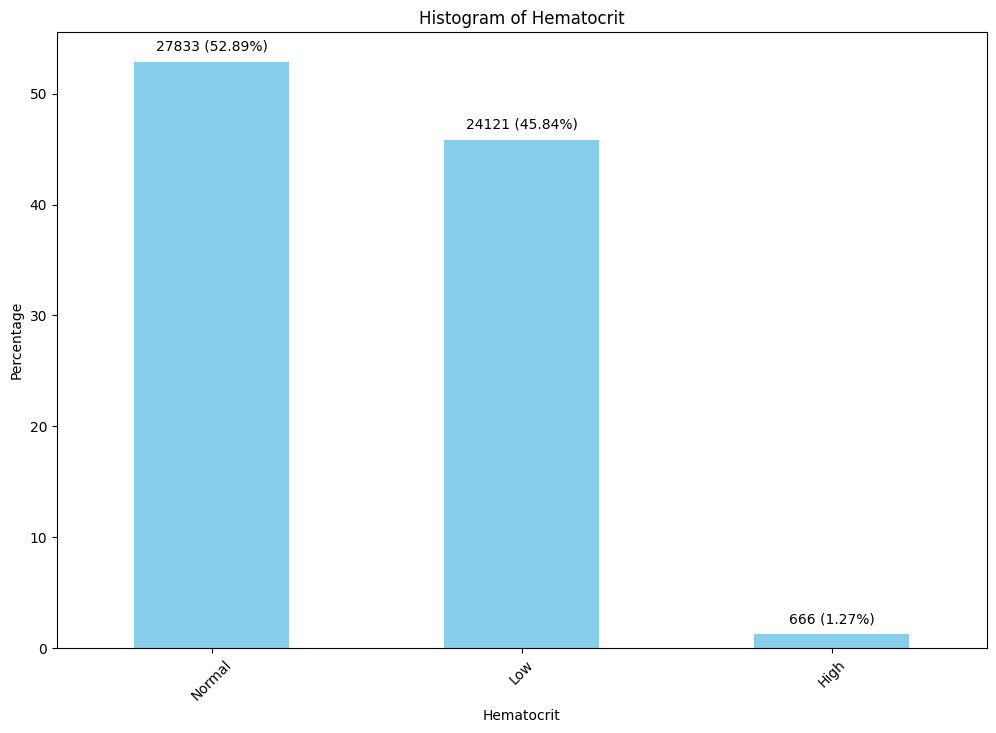

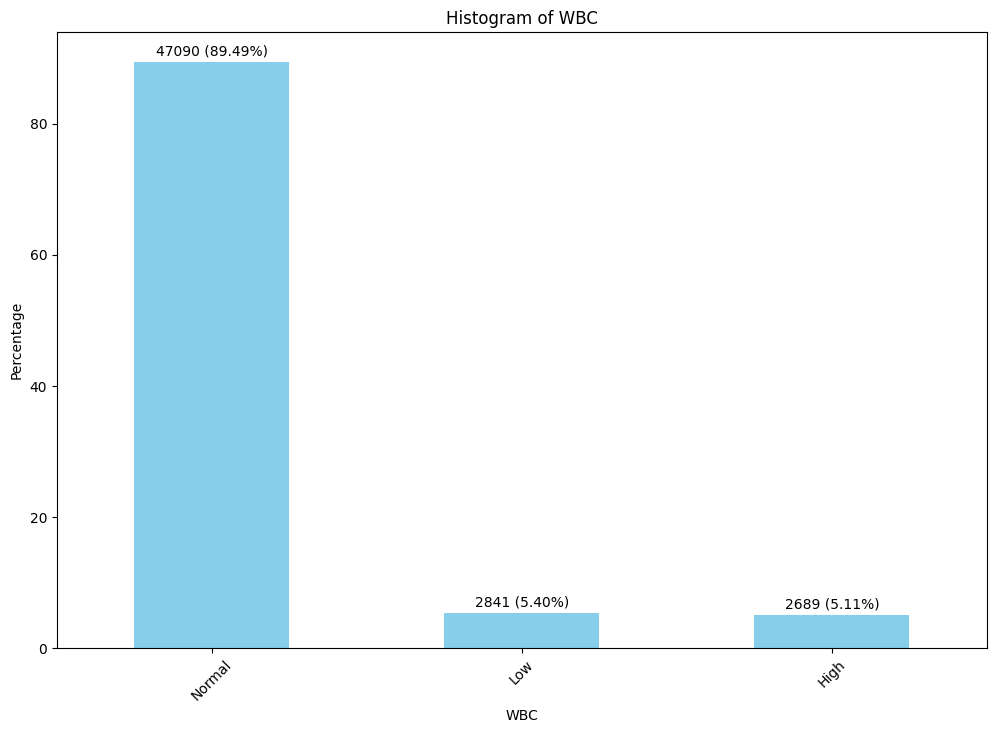

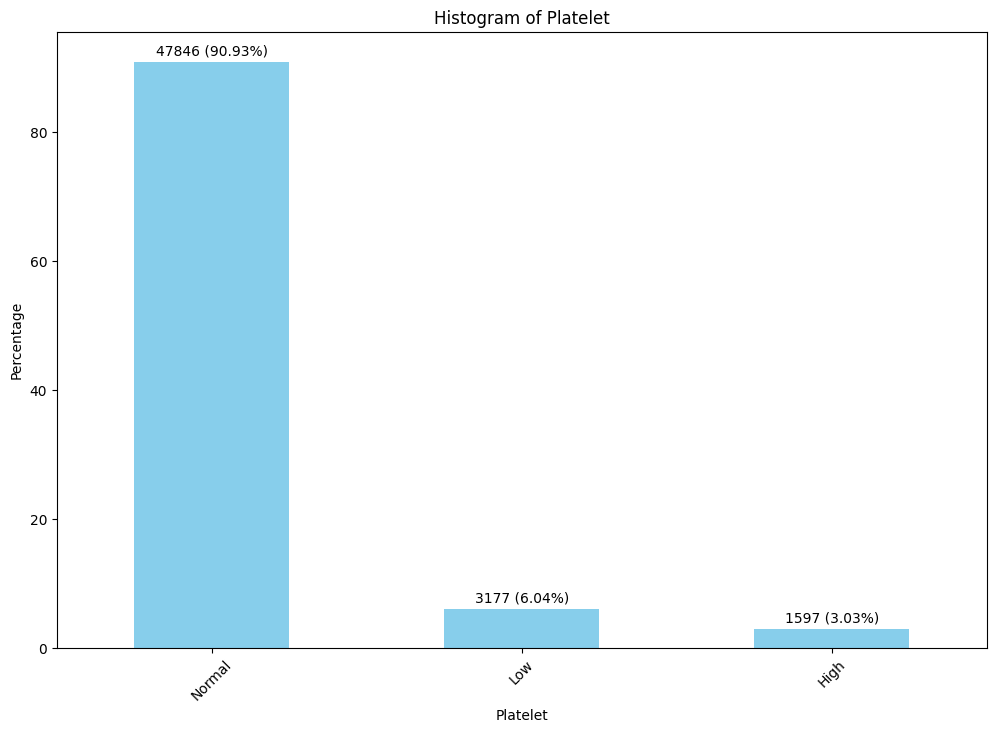

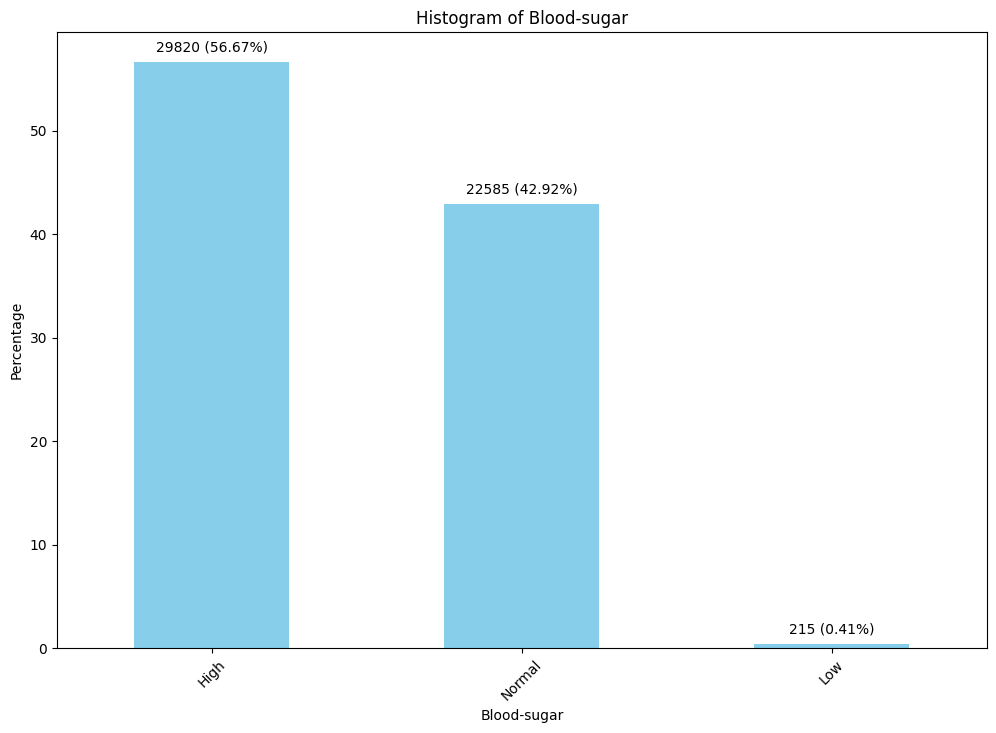

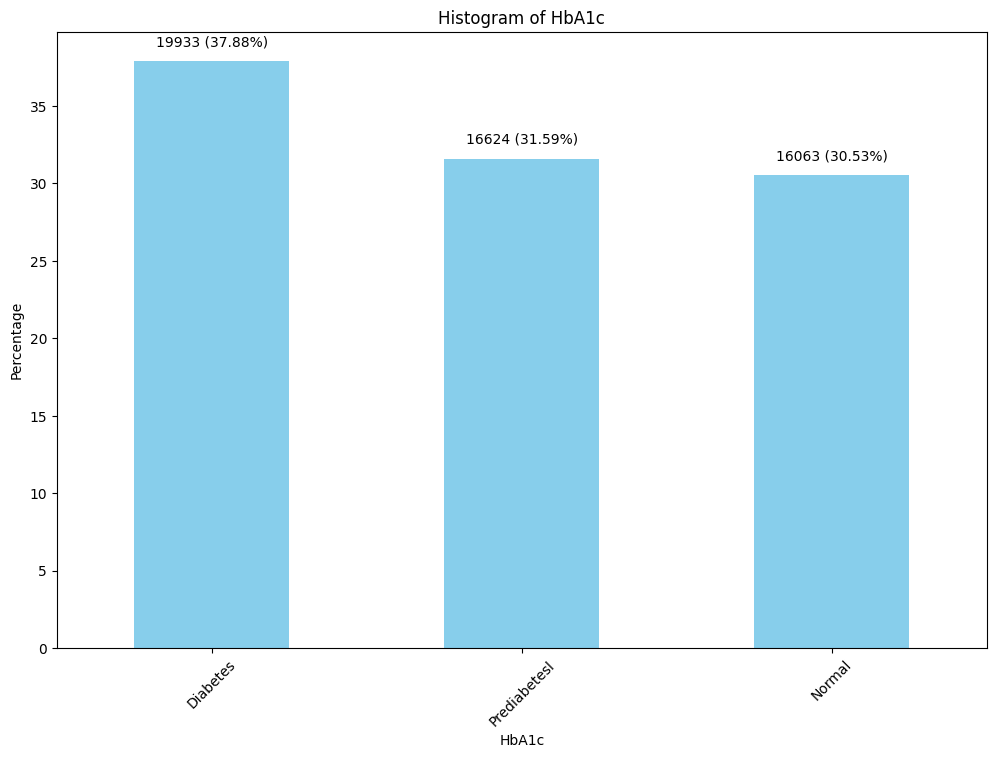

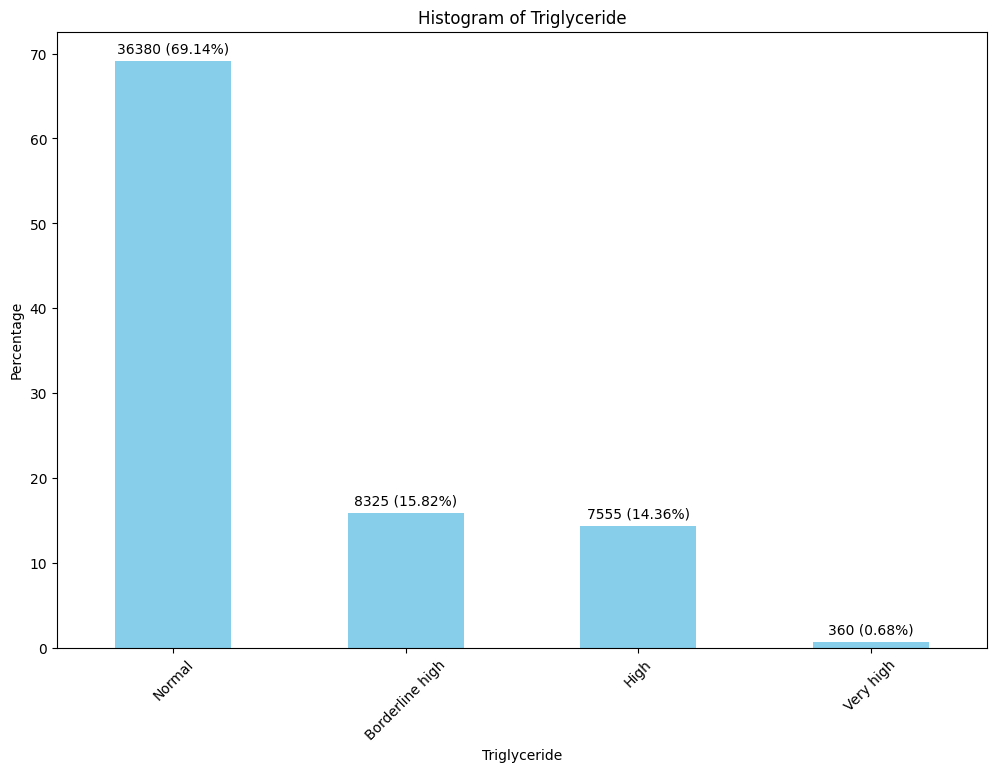

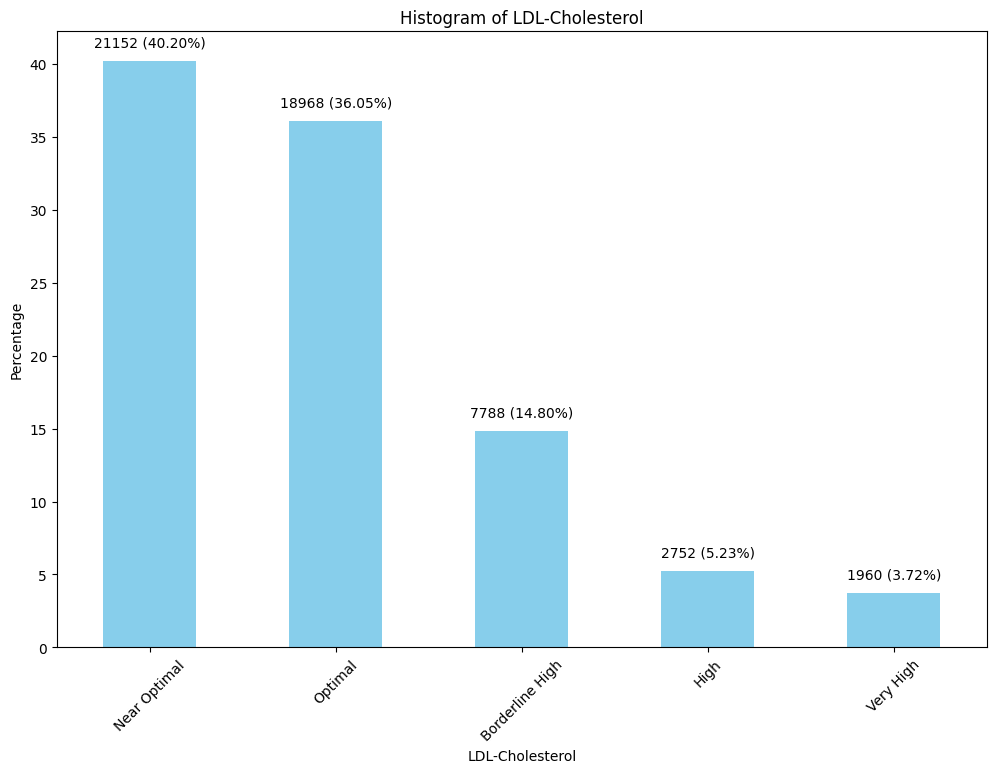

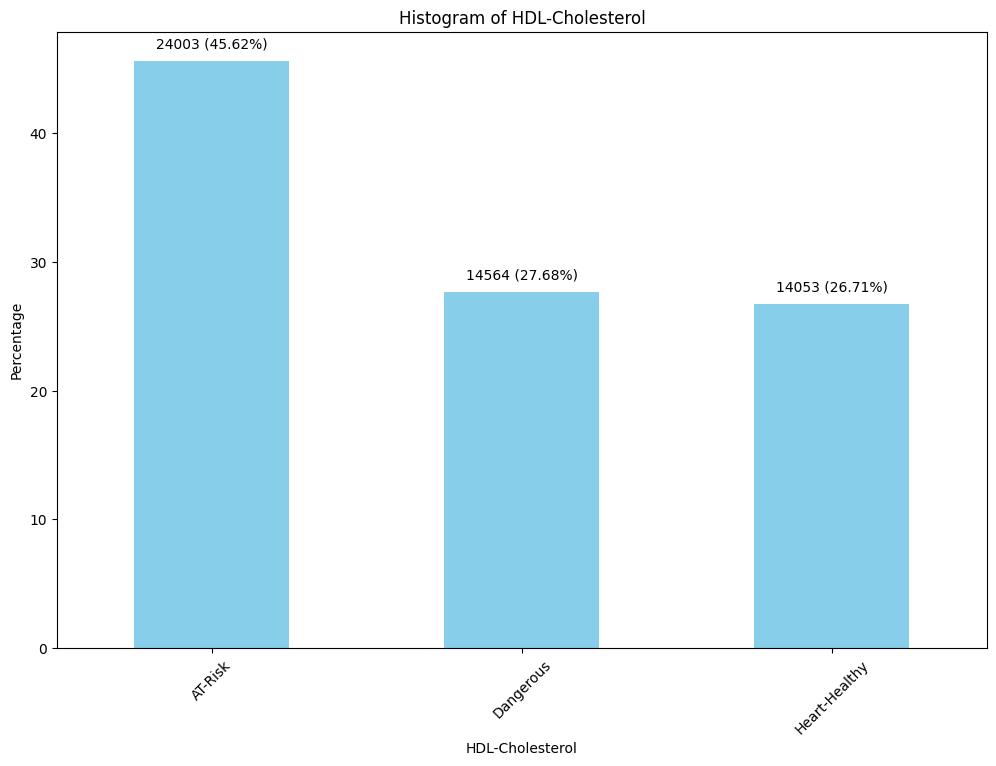

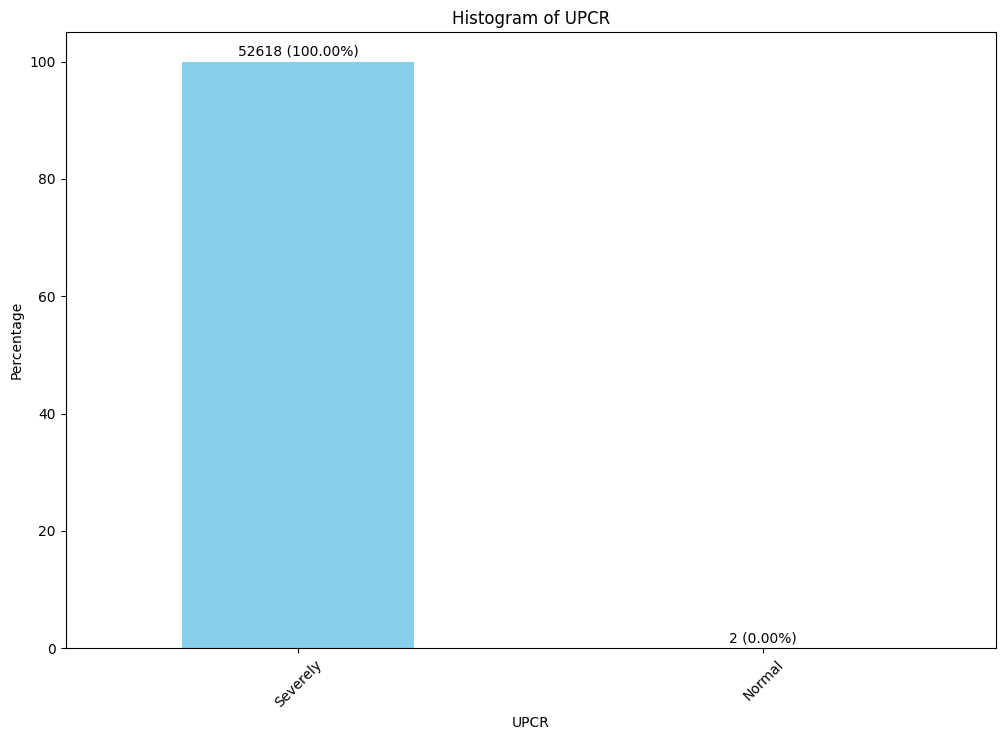

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
object_category_columns = data.select_dtypes(include=['object', 'category', 'int64']).columns

for column in object_category_columns:
    plt.figure(figsize=(12, 8))
    value_counts = data[column].value_counts(normalize=True) * 100  # แปลงเป็นเปอร์เซ็นต์
    total_records = len(data[column])

    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)

    for i, (value, count) in enumerate(zip(value_counts, data[column].value_counts())):
        plt.text(i, value + 1, f'{count} ({value:.2f}%)', ha='center')  # สลับตำแหน่ง count และ value

    plt.show()

### Analysis

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [56]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InPatient,OutPatient,Sex,Age,BMI,BSA,SBP,Slopes,G1M2-ARB,G3M1-Statin,...,Hemoglobin,Hematocrit,WBC,Platelet,Blood-sugar,HbA1c,Triglyceride,LDL-Cholesterol,HDL-Cholesterol,UPCR
0,0,1,Female,Older,Healthy weight,Abnormal,Risk,Stable and better,1,0,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Near Optimal,Heart-Healthy,Severely
1,0,1,Female,Older,Healthy weight,Abnormal,Normal,Worse,1,1,...,Normal,Normal,Normal,Normal,Normal,Prediabetesl,Normal,Borderline High,Heart-Healthy,Severely
2,0,1,Female,Older,Healthy weight,Abnormal,Risk,Stable and better,1,1,...,Low,Low,Normal,Normal,Normal,Normal,Normal,Near Optimal,Heart-Healthy,Severely
3,0,1,Female,Older,Healthy weight,Abnormal,Risk,Stable and better,1,0,...,Normal,Normal,Low,Normal,Normal,Normal,Normal,Borderline High,Heart-Healthy,Severely
4,0,1,Female,Older,Healthy weight,Abnormal,Normal,Worse,1,0,...,Low,Low,Normal,High,Normal,Normal,Normal,Near Optimal,Heart-Healthy,Severely


In [57]:
# เลือกคอลัมน์ที่มีชนิดข้อมูลเป็น string object
string_columns = data.select_dtypes(include='object').columns.tolist()

# แสดงรายชื่อคอลัมน์ที่เป็น string object
print(string_columns)

['Sex', 'BMI', 'BSA', 'Slopes', 'eGFR', 'BUN', 'Sodium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Reduce memory usage by changing data types of columns (if applicable)
# For example, converting categorical columns to a more memory-efficient type like 'category'
# Assuming 'data' is your DataFrame, replace column names with your actual categorical columns
categorical_columns = ['Sex', 'Age', 'SBP','BMI', 'BSA', 'Slopes', 'eGFR', 'BUN', 'Sodium',
                       'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus', 'Albumin',
                       'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                       'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']  # Replace with your categorical column names
data[categorical_columns] = data[categorical_columns].astype('category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-58-e78d57d1c256>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_columns] = data[categorical_columns].astype('category')


In [59]:
# One-hot encode categorical columns
association = pd.get_dummies(data, columns=categorical_columns)
association.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(52620, 108)

In [60]:
asso = association.astype(bool)
asso.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InPatient,OutPatient,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,...,LDL-Cholesterol_Borderline High,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Normal,UPCR_Severely
0,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2,False,True,True,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
3,False,True,True,False,True,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,False,True,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [ ]:
#association.to_csv('association_all.csv')

In [61]:
#asso.to_csv('Losso_asso.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###  Apriori algorithm

In [62]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

# Apriori min support
min_support = 0.2

# Max length of apriori n-grams
max_len = 10

#frequent_items = apriori(asso, use_colnames=True, min_support=min_support, max_len=max_len + 1)
#rules = association_rules(frequent_items, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

###Rule

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####New code from outlier file

In [2]:
# ตรวจสอบค่า unique ในคอลัมน์ consequents ที่ขึ้นต้นด้วย frozenset({'Slopes'})
#slopes_values = rules[rules['consequents'].apply(lambda x: x.startswith("frozenset({'Slopes"))]['consequents'].unique()
#print(slopes_values)

In [3]:
# ตรวจสอบค่า unique ในคอลัมน์ consequents ที่ขึ้นต้นด้วย frozenset({'eGFR'})
#eGFR_values = rules[rules['consequents'].apply(lambda x: x.startswith("frozenset({'eGFR"))]['consequents'].unique()
#print(eGFR_values)

In [4]:
#desired_frozenset = "frozenset({'Slopes_Stable and better'})"
#Slopes_Stable_and_better = rules[rules['consequents'].apply(lambda x: desired_frozenset in x)].sort_values(by='confidence', ascending=False)

In [5]:
import pandas as pd
rules_slopes = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/Slopes_Stable_and_better.csv', index_col=0)
rules_slopes.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10815898,"frozenset({'Platelet_Normal', 'eGFR_stage 2', ...",frozenset({'Slopes_Stable and better'}),0.261992,0.658419,0.202204,0.771797,1.172198,0.029704,1.496833,0.199052
3478163,"frozenset({'Platelet_Normal', 'eGFR_stage 2', ...",frozenset({'Slopes_Stable and better'}),0.261992,0.658419,0.202204,0.771797,1.172198,0.029704,1.496833,0.199052
22527720,"frozenset({'eGFR_stage 2', 'Uric_Normal', 'WBC...",frozenset({'Slopes_Stable and better'}),0.266135,0.658419,0.205207,0.771065,1.171086,0.029979,1.492047,0.199072
9612737,"frozenset({'eGFR_stage 2', 'Uric_Normal', 'WBC...",frozenset({'Slopes_Stable and better'}),0.266135,0.658419,0.205207,0.771065,1.171086,0.029979,1.492047,0.199072
3477799,"frozenset({'eGFR_stage 2', 'Uric_Normal', 'WBC...",frozenset({'Slopes_Stable and better'}),0.270353,0.658419,0.208457,0.771053,1.171068,0.030451,1.491966,0.200204


In [6]:
rules_slopes.shape

(43541, 10)

In [7]:
sorted_rules_slopes = rules_slopes.sort_values(by='support', ascending=False)
sorted_rules_slopes.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
294,frozenset({'BSA_Abnormal'}),frozenset({'Slopes_Stable and better'}),0.985538,0.658419,0.649183,0.658709,1.000441,0.000286,1.000851,0.030478
8534,"frozenset({'BSA_Abnormal', 'UPCR_Severely'})",frozenset({'Slopes_Stable and better'}),0.985500,0.658419,0.649145,0.658696,1.000421,0.000273,1.000812,0.029020
333,frozenset({'Albumin_Normal'}),frozenset({'Slopes_Stable and better'}),0.956651,0.658419,0.630654,0.659230,1.001233,0.000776,1.002382,0.028400
10125,"frozenset({'Albumin_Normal', 'UPCR_Severely'})",frozenset({'Slopes_Stable and better'}),0.956613,0.658419,0.630616,0.659217,1.001212,0.000763,1.002342,0.027902
8475,"frozenset({'BSA_Abnormal', 'Albumin_Normal'})",frozenset({'Slopes_Stable and better'}),0.942512,0.658419,0.621646,0.659562,1.001737,0.001078,1.003359,0.030161


In [8]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_slopes.query('0.2 <= support < 0.3').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(36806, 10)

In [9]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10815898,"frozenset({'Platelet_Normal', 'eGFR_stage 2', ...",frozenset({'Slopes_Stable and better'}),0.261992,0.658419,0.202204,0.771797,1.172198,0.029704,1.496833,0.199052
3478163,"frozenset({'Platelet_Normal', 'eGFR_stage 2', ...",frozenset({'Slopes_Stable and better'}),0.261992,0.658419,0.202204,0.771797,1.172198,0.029704,1.496833,0.199052
22527720,"frozenset({'eGFR_stage 2', 'Uric_Normal', 'WBC...",frozenset({'Slopes_Stable and better'}),0.266135,0.658419,0.205207,0.771065,1.171086,0.029979,1.492047,0.199072
9612737,"frozenset({'eGFR_stage 2', 'Uric_Normal', 'WBC...",frozenset({'Slopes_Stable and better'}),0.266135,0.658419,0.205207,0.771065,1.171086,0.029979,1.492047,0.199072
3477799,"frozenset({'eGFR_stage 2', 'Uric_Normal', 'WBC...",frozenset({'Slopes_Stable and better'}),0.270353,0.658419,0.208457,0.771053,1.171068,0.030451,1.491966,0.200204


In [10]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/slopes_better_0.2.csv')

In [11]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_slopes.query('0.3 <= support < 0.4').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(4910, 10)

In [12]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3055111,"frozenset({'Uric_Normal', 'WBC_Normal', 'Calci...",frozenset({'Slopes_Stable and better'}),0.481243,0.658419,0.327214,0.679935,1.032679,0.010355,1.067225,0.061001
9670505,"frozenset({'Uric_Normal', 'WBC_Normal', 'Calci...",frozenset({'Slopes_Stable and better'}),0.481224,0.658419,0.327195,0.679923,1.032660,0.010348,1.067183,0.060964
3055690,"frozenset({'Uric_Normal', 'WBC_Normal', 'BSA_A...",frozenset({'Slopes_Stable and better'}),0.488731,0.658419,0.332288,0.679900,1.032626,0.010499,1.067109,0.061798
9672774,"frozenset({'Uric_Normal', 'WBC_Normal', 'BSA_A...",frozenset({'Slopes_Stable and better'}),0.488712,0.658419,0.332269,0.679888,1.032607,0.010492,1.067068,0.061761
9669384,"frozenset({'Uric_Normal', 'WBC_Normal', 'Calci...",frozenset({'Slopes_Stable and better'}),0.477176,0.658419,0.324401,0.679836,1.032528,0.010220,1.066894,0.060256


In [13]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/slopes_better_0.3.csv')

In [14]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_slopes.query('0.4 <= support < 0.5').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(1334, 10)

In [15]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3103431,"frozenset({'Uric_Normal', 'WBC_Normal', 'Calci...",frozenset({'Slopes_Stable and better'}),0.600646,0.658419,0.406176,0.676232,1.027055,0.010700,1.055019,0.065962
9837705,"frozenset({'Uric_Normal', 'WBC_Normal', 'Calci...",frozenset({'Slopes_Stable and better'}),0.600608,0.658419,0.406138,0.676212,1.027024,0.010687,1.054953,0.065882
690121,"frozenset({'BSA_Abnormal', 'WBC_Normal', 'Uric...",frozenset({'Slopes_Stable and better'}),0.617446,0.658419,0.417522,0.676208,1.027018,0.010984,1.054940,0.068768
3105963,"frozenset({'Uric_Normal', 'WBC_Normal', 'BSA_A...",frozenset({'Slopes_Stable and better'}),0.617408,0.658419,0.417484,0.676188,1.026988,0.010971,1.054875,0.068686
689758,"frozenset({'Calcium_Normal', 'BSA_Abnormal', '...",frozenset({'Slopes_Stable and better'}),0.607602,0.658419,0.410813,0.676123,1.026889,0.010757,1.054663,0.066730


In [16]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/slopes_better_0.4.csv')

In [17]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_slopes.query('0.5 <= support < 0.6').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(471, 10)

In [18]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
691730,"frozenset({'Calcium_Normal', 'Platelet_Normal'...",frozenset({'Slopes_Stable and better'}),0.790555,0.658419,0.522938,0.661482,1.004653,0.002422,1.009049,0.022111
3112480,"frozenset({'Platelet_Normal', 'WBC_Normal', 'C...",frozenset({'Slopes_Stable and better'}),0.790517,0.658419,0.522900,0.661466,1.004628,0.002409,1.009001,0.021990
100933,"frozenset({'Calcium_Normal', 'BSA_Abnormal', '...",frozenset({'Slopes_Stable and better'}),0.839909,0.658419,0.555492,0.661372,1.004485,0.002480,1.008721,0.027892
691898,"frozenset({'Calcium_Normal', 'BSA_Abnormal', '...",frozenset({'Slopes_Stable and better'}),0.839871,0.658419,0.555454,0.661357,1.004462,0.002467,1.008675,0.027741
3109923,"frozenset({'Platelet_Normal', 'WBC_Normal', 'C...",frozenset({'Slopes_Stable and better'}),0.783941,0.658419,0.518434,0.661317,1.004402,0.002272,1.008558,0.020285


In [19]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/slopes_better_0.5.csv')

In [20]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_slopes.query('0.6 <= support < 0.7').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(20, 10)

In [21]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
100891,"frozenset({'Calcium_Normal', 'BSA_Abnormal', '...",frozenset({'Slopes_Stable and better'}),0.913113,0.658419,0.602661,0.660007,1.002412,0.001450,1.004670,0.027688
691425,"frozenset({'Calcium_Normal', 'BSA_Abnormal', '...",frozenset({'Slopes_Stable and better'}),0.913075,0.658419,0.602623,0.659993,1.002390,0.001437,1.004628,0.027430
8468,"frozenset({'Calcium_Normal', 'BSA_Abnormal'})",frozenset({'Slopes_Stable and better'}),0.928164,0.658419,0.612448,0.659848,1.002171,0.001327,1.004203,0.030161
101018,"frozenset({'Calcium_Normal', 'BSA_Abnormal', '...",frozenset({'Slopes_Stable and better'}),0.928126,0.658419,0.612410,0.659835,1.002150,0.001314,1.004162,0.029852
9975,"frozenset({'Calcium_Normal', 'Albumin_Normal'})",frozenset({'Slopes_Stable and better'}),0.927062,0.658419,0.611517,0.659629,1.001837,0.001121,1.003554,0.025143


In [22]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/slopes_better_0.6.csv')

In [23]:
#desired_frozenset = "frozenset({'eGFR_stage 2'})"
#eGFR_stage_2 = rules[rules['consequents'].apply(lambda x: desired_frozenset in x)].sort_values(by='confidence', ascending=False)

In [24]:
import pandas as pd
rules_eGFR_stage2 = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/eGFR_stage_2.csv', index_col=0)
rules_eGFR_stage2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3468043,"frozenset({'Uric_Normal', 'Slopes_Stable and b...",frozenset({'eGFR_stage 2'}),0.369346,0.380008,0.202870,0.549267,1.445410,0.062515,1.375520,0.488628
780638,"frozenset({'Slopes_Stable and better', 'BUN_No...",frozenset({'eGFR_stage 2'}),0.369365,0.380008,0.202870,0.549239,1.445336,0.062508,1.375433,0.488586
780668,"frozenset({'Slopes_Stable and better', 'BUN_No...",frozenset({'eGFR_stage 2'}),0.380331,0.380008,0.208704,0.548743,1.444032,0.064175,1.373924,0.496224
114398,"frozenset({'Slopes_Stable and better', 'BUN_No...",frozenset({'eGFR_stage 2'}),0.380350,0.380008,0.208704,0.548716,1.443960,0.064168,1.373841,0.496183
3037418,"frozenset({'Uric_Normal', 'BSA_Abnormal', 'Slo...",frozenset({'eGFR_stage 2'}),0.375105,0.380008,0.205587,0.548080,1.442287,0.063045,1.371907,0.490732


In [25]:
rules_eGFR_stage2.shape

(10121, 10)

In [26]:
sorted_rules_eGFR2 = rules_eGFR_stage2.sort_values(by='support', ascending=False)
sorted_rules_eGFR2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
373,frozenset({'UPCR_Severely'}),frozenset({'eGFR_stage 2'}),0.999962,0.380008,0.380008,0.380022,1.000038,0.000014,1.000023,1.000000
363,frozenset({'Albumin_Normal'}),frozenset({'eGFR_stage 2'}),0.956651,0.380008,0.363740,0.380222,1.000564,0.000205,1.000346,0.013014
10648,"frozenset({'Albumin_Normal', 'UPCR_Severely'})",frozenset({'eGFR_stage 2'}),0.956613,0.380008,0.363740,0.380237,1.000604,0.000220,1.000370,0.013918
10415,"frozenset({'Sodium_Normal', 'UPCR_Severely'})",frozenset({'eGFR_stage 2'}),0.933238,0.380008,0.359141,0.384833,1.012698,0.004503,1.007844,0.187821
352,frozenset({'Sodium_Normal'}),frozenset({'eGFR_stage 2'}),0.933276,0.380008,0.359141,0.384817,1.012657,0.004489,1.007819,0.187325


In [27]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_eGFR_stage2.query('0.2 <= support < 0.3').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(9736, 10)

In [28]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3468043,"frozenset({'Uric_Normal', 'Slopes_Stable and b...",frozenset({'eGFR_stage 2'}),0.369346,0.380008,0.202870,0.549267,1.445410,0.062515,1.375520,0.488628
780638,"frozenset({'Slopes_Stable and better', 'BUN_No...",frozenset({'eGFR_stage 2'}),0.369365,0.380008,0.202870,0.549239,1.445336,0.062508,1.375433,0.488586
780668,"frozenset({'Slopes_Stable and better', 'BUN_No...",frozenset({'eGFR_stage 2'}),0.380331,0.380008,0.208704,0.548743,1.444032,0.064175,1.373924,0.496224
114398,"frozenset({'Slopes_Stable and better', 'BUN_No...",frozenset({'eGFR_stage 2'}),0.380350,0.380008,0.208704,0.548716,1.443960,0.064168,1.373841,0.496183
3037418,"frozenset({'Uric_Normal', 'BSA_Abnormal', 'Slo...",frozenset({'eGFR_stage 2'}),0.375105,0.380008,0.205587,0.548080,1.442287,0.063045,1.371907,0.490732


In [29]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/eGFR_stage2_0.2.csv')

In [30]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_eGFR_stage2.query('0.3 <= support < 0.4').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(385, 10)

In [31]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
122301,"frozenset({'Chloride_Normal', 'BUN_Normal', 'U...",frozenset({'eGFR_stage 2'}),0.658799,0.380008,0.305017,0.462990,1.218370,0.054669,1.154526,0.525294
10294,"frozenset({'Chloride_Normal', 'BUN_Normal'})",frozenset({'eGFR_stage 2'}),0.658818,0.380008,0.305017,0.462976,1.218334,0.054661,1.154497,0.525254
695545,"frozenset({'BSA_Abnormal', 'Chloride_Normal', ...",frozenset({'eGFR_stage 2'}),0.648708,0.380008,0.300228,0.462809,1.217895,0.053714,1.154139,0.509295
101678,"frozenset({'BSA_Abnormal', 'Chloride_Normal', ...",frozenset({'eGFR_stage 2'}),0.648727,0.380008,0.300228,0.462796,1.217860,0.053707,1.154110,0.509254
122164,"frozenset({'Sodium_Normal', 'BUN_Normal', 'UPC...",frozenset({'eGFR_stage 2'}),0.666724,0.380008,0.308229,0.462304,1.216564,0.054869,1.153053,0.534130


In [32]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/eGFR_stage2_0.3.csv')

In [33]:
#desired_frozenset = "frozenset({'eGFR_stage 3a'})"
#eGFR_stage_3a = rules[rules['consequents'].apply(lambda x: desired_frozenset in x)].sort_values(by='confidence', ascending=False)

In [34]:
import pandas as pd
rules_eGFR_stage3a = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/eGFR_stage_3a.csv', index_col=0)
rules_eGFR_stage3a.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35814905,"frozenset({'Chloride_Normal', 'WBC_Normal', 'U...",frozenset({'eGFR_stage 3a'}),0.485557,0.361783,0.205530,0.423288,1.170006,0.029864,1.106648,0.282448
17920134,"frozenset({'Chloride_Normal', 'WBC_Normal', 'O...",frozenset({'eGFR_stage 3a'}),0.485557,0.361783,0.205530,0.423288,1.170006,0.029864,1.106648,0.282448
32169492,"frozenset({'Chloride_Normal', 'WBC_Normal', 'O...",frozenset({'eGFR_stage 3a'}),0.477575,0.361783,0.202147,0.423279,1.169982,0.029369,1.106631,0.278099
51434025,"frozenset({'Chloride_Normal', 'WBC_Normal', 'P...",frozenset({'eGFR_stage 3a'}),0.477575,0.361783,0.202147,0.423279,1.169982,0.029369,1.106631,0.278099
17926484,"frozenset({'Platelet_Normal', 'WBC_Normal', 'O...",frozenset({'eGFR_stage 3a'}),0.486051,0.361783,0.205720,0.423248,1.169897,0.029875,1.106572,0.282565


In [35]:
rules_eGFR_stage3a.shape

(5467, 10)

In [36]:
sorted_rules_eGFR3a = rules_eGFR_stage3a.sort_values(by='support', ascending=False)
sorted_rules_eGFR3a.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
389,frozenset({'Albumin_Normal'}),frozenset({'eGFR_stage 3a'}),0.956651,0.361783,0.352452,0.368422,1.018352,0.006352,1.010513,0.415734
11060,"frozenset({'Albumin_Normal', 'UPCR_Severely'})",frozenset({'eGFR_stage 3a'}),0.956613,0.361783,0.352414,0.368397,1.018283,0.006327,1.010472,0.413828
384,frozenset({'Calcium_Normal'}),frozenset({'eGFR_stage 3a'}),0.942303,0.361783,0.347948,0.369252,1.020647,0.007039,1.011842,0.350609
11004,"frozenset({'Calcium_Normal', 'UPCR_Severely'})",frozenset({'eGFR_stage 3a'}),0.942265,0.361783,0.347910,0.369227,1.020576,0.007014,1.011802,0.349208
8613,"frozenset({'BSA_Abnormal', 'Albumin_Normal'})",frozenset({'eGFR_stage 3a'}),0.942512,0.361783,0.347282,0.368465,1.018470,0.006298,1.010581,0.315453


In [37]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_eGFR_stage3a.query('0.2 <= support < 0.3').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(5211, 10)

In [38]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35814905,"frozenset({'Chloride_Normal', 'WBC_Normal', 'U...",frozenset({'eGFR_stage 3a'}),0.485557,0.361783,0.205530,0.423288,1.170006,0.029864,1.106648,0.282448
17920134,"frozenset({'Chloride_Normal', 'WBC_Normal', 'O...",frozenset({'eGFR_stage 3a'}),0.485557,0.361783,0.205530,0.423288,1.170006,0.029864,1.106648,0.282448
32169492,"frozenset({'Chloride_Normal', 'WBC_Normal', 'O...",frozenset({'eGFR_stage 3a'}),0.477575,0.361783,0.202147,0.423279,1.169982,0.029369,1.106631,0.278099
51434025,"frozenset({'Chloride_Normal', 'WBC_Normal', 'P...",frozenset({'eGFR_stage 3a'}),0.477575,0.361783,0.202147,0.423279,1.169982,0.029369,1.106631,0.278099
17926484,"frozenset({'Platelet_Normal', 'WBC_Normal', 'O...",frozenset({'eGFR_stage 3a'}),0.486051,0.361783,0.205720,0.423248,1.169897,0.029875,1.106572,0.282565


In [39]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/eGFR_stage3a_0.2.csv')

In [40]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.2 แต่น้อยกว่า 0.3
filtered_rules = rules_eGFR_stage3a.query('0.3 <= support < 0.4').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
filtered_rules.shape

(256, 10)

In [41]:
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
126568,"frozenset({'Chloride_Normal', 'Albumin_Normal'...",frozenset({'eGFR_stage 3a'}),0.793729,0.361783,0.301387,0.379711,1.049555,0.014230,1.028903,0.228899
842530,"frozenset({'Chloride_Normal', 'Albumin_Normal'...",frozenset({'eGFR_stage 3a'}),0.793691,0.361783,0.301349,0.379681,1.049473,0.014206,1.028854,0.228496
126043,"frozenset({'Calcium_Normal', 'Sodium_Normal', ...",frozenset({'eGFR_stage 3a'}),0.795211,0.361783,0.301501,0.379146,1.047995,0.013808,1.027968,0.223630
840148,"frozenset({'Calcium_Normal', 'Sodium_Normal', ...",frozenset({'eGFR_stage 3a'}),0.795173,0.361783,0.301463,0.379117,1.047913,0.013784,1.027918,0.223224
34356,"frozenset({'Chloride_Normal', 'Albumin_Normal'...",frozenset({'eGFR_stage 3a'}),0.801121,0.361783,0.303326,0.378626,1.046558,0.013494,1.027108,0.223688


In [42]:
#filtered_rules.to_csv('/content/drive/MyDrive/ULckdresearch2023/eGFR_stage3a_0.3.csv')

อ้างอิง : https://www.kaggle.com/code/slamnz/association-rules-mining-mental-health-survey  ❎
https://www.kaggle.com/code/raphael2711/customer-personnas-with-apriori-algorithm ✅